# Analysis of stock returns forecasts

**Reference**: Realized GARCH models: Simpler is better (Xie & Yu, 2019)

Sample: Canada (^GSPTSE)

In [1]:
# Memory clearing
rm(list=ls())

## 1. Data import

In [2]:
# Packages
install.packages('quantmod')
install.packages('tidyquant')
install.packages('PerformanceAnalytics')

library(quantmod)
library(tidyquant)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘globals’, ‘later’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘quadprog’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘forecast’, ‘snakecase’, ‘PerformanceAnalytics’, ‘lazyeval’, ‘Quandl’, ‘riingo’, ‘alphavantager’, ‘timetk’, ‘timeDate’, ‘janitor’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method 

**Reading the datas (Source: Yahoo Finance)**

In [3]:
getSymbols("^GSPTSE", from = '2000-01-01', to = '2021-05-31') 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Warning message:
“^GSPTSE contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "^GSPTSE"

**Checking data frequency**

In [4]:
periodicity(GSPTSE)        

Daily periodicity from 2000-01-04 to 2021-05-28 

**Identifying missing values (%)**

In [5]:
round(prop.table(table(is.na(GSPTSE)))*100, digits = 2)       


FALSE  TRUE 
99.17  0.83 

**Removing missing values**

In [6]:
GSPTSE <- na.omit(GSPTSE)    
round(prop.table(table(is.na(GSPTSE)))*100, digits = 2)         


FALSE 
  100 

**Removing unnecessary features**

In [7]:
GSPTSE.df <- GSPTSE[,'GSPTSE.Close']                              
head(GSPTSE.df)

           GSPTSE.Close
2000-01-04       8202.6
2000-01-05       8119.4
2000-01-06       8114.2
2000-01-07       8429.4
2000-01-10       8602.5
2000-01-11       8442.6

**Calculating log-returns**

In [8]:
logreturn <- diff(log(GSPTSE.df$GSPTSE.Close))*100                     
head(logreturn)

           GSPTSE.Close
2000-01-04           NA
2000-01-05  -1.01948818
2000-01-06  -0.06406105
2000-01-07   3.81100042
2000-01-10   2.03272172
2000-01-11  -1.87625870

**Aggregating the data**

In [9]:
GSPTSE.df$GSPTSE.Return <- logreturn                  
GSPTSE.df <- na.omit(GSPTSE.df)
head(GSPTSE.df)

           GSPTSE.Close GSPTSE.Return
2000-01-05       8119.4   -1.01948818
2000-01-06       8114.2   -0.06406105
2000-01-07       8429.4    3.81100042
2000-01-10       8602.5    2.03272172
2000-01-11       8442.6   -1.87625870
2000-01-12       8360.0   -0.98318446

**Identifying missing values (%)**

In [10]:
round(prop.table(table(is.na(GSPTSE.df)))*100, digits = 2)       


FALSE 
  100 

## 2. Graph analysis

In [11]:
# Package
install.packages('xts')
install.packages('ggplot2')
install.packages('gridExtra')

library(xts)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Price & Return charts**

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



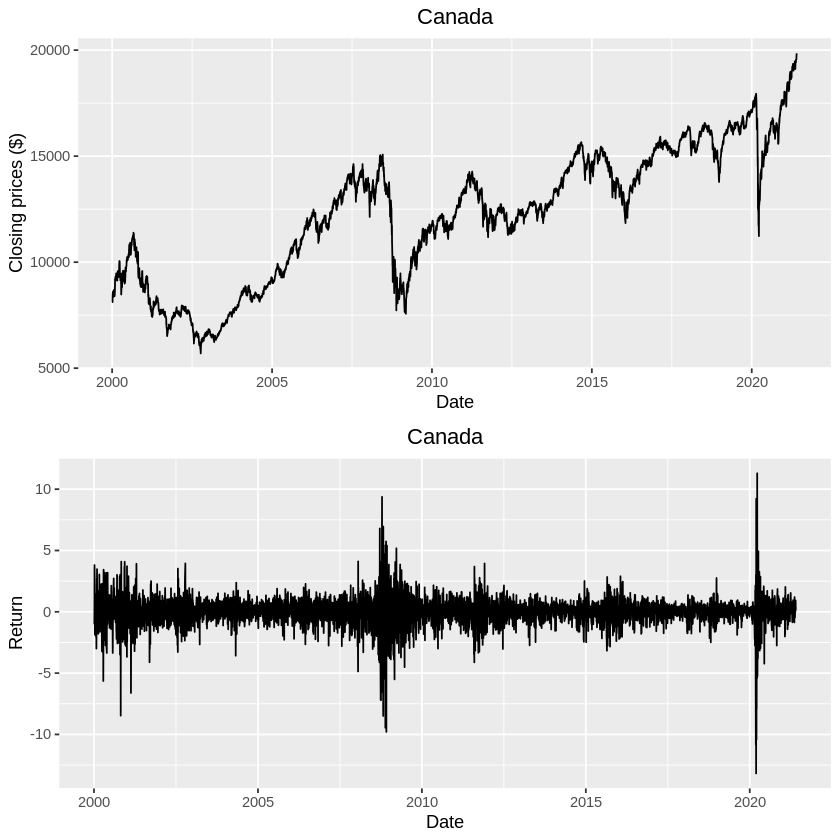

In [12]:
# Price chart
graph1 <- ggplot(GSPTSE.df,
                aes(x = index(GSPTSE.df), y = GSPTSE.df[,'GSPTSE.Close'])) +
                geom_line(color = "black") +
                ggtitle("Canada") +
                xlab("Date") +
                ylab("Closing prices ($)") +
                theme(plot.title = element_text(hjust = 0.5))

# Return chart
graph2 <- ggplot(GSPTSE.df,
                aes(x = index(GSPTSE.df), y = GSPTSE.df[,'GSPTSE.Return'])) +
                geom_line(color = "black") +
                ggtitle("Canada") +
                xlab("Date") +
                ylab("Return") +
                theme(plot.title = element_text(hjust = 0.5))

grid.arrange(graph1, graph2, ncol = 1, nrow = 2)

## 3. Descriptive statistic

In [13]:
# Packages
install.packages('moments')

library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘moments’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness




**Descriptive statistic**

In [14]:
# mean
round(mean(GSPTSE.df$GSPTSE.Return), 3)                         

[1] 0.016

In [15]:
# sd
round(sd(GSPTSE.df$GSPTSE.Return), 3)                           

[1] 1.13

In [16]:
# skewness
round(skewness(GSPTSE.df$GSPTSE.Return), 3)                     

GSPTSE.Return 
       -0.945

In [17]:
# kurtosis
round(kurtosis(GSPTSE.df$GSPTSE.Return), 3)                     

GSPTSE.Return 
       19.877

In [18]:
# min
round(min(GSPTSE.df$GSPTSE.Return), 3)                          

[1] -13.176

In [19]:
# p5
round(quantile(GSPTSE.df$GSPTSE.Return, probs = 0.05), 3)       

5% 
-1.684

In [20]:
# p25
round(quantile(GSPTSE.df$GSPTSE.Return, probs = 0.25), 3)       

25% 
-0.437

In [21]:
# median
round(median(GSPTSE.df$GSPTSE.Return), 3)                       

[1] 0.071

In [22]:
# p75
round(quantile(GSPTSE.df$GSPTSE.Return, probs = 0.75), 3)       

75% 
0.548

In [23]:
# p95
round(quantile(GSPTSE.df$GSPTSE.Return, probs = 0.95), 3)       

95% 
1.484

In [24]:
# max
round(max(GSPTSE.df$GSPTSE.Return), 3)                          

[1] 11.295

In [25]:
# n observations
length(GSPTSE.df$GSPTSE.Return)                                 

[1] 5377

## 4. Series normality analysis

In [26]:
# Package
library(tseries)

In [27]:
jarque.bera.test(GSPTSE.df$GSPTSE.Return)


	Jarque Bera Test

data:  GSPTSE.df$GSPTSE.Return
X-squared = 64616, df = 2, p-value < 2.2e-16


## 5. Autocorrelation pattern analysis

In [28]:
# Packages
install.packages('TSA')
install.packages('aTSA')
install.packages('FinTS')

library(TSA)
library(aTSA)
library(FinTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘TSA’


The following objects are masked from ‘package:moments’:

    kurtosis, skewness


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar



Attaching package: ‘aTSA’


The following objects are masked from ‘package:tseries’:

    adf.test, kpss.test, pp.test


The following object is masked from ‘package:graphics’:

    identify




**McLeod-Li test for conditional heteroskedasticity (ARCH effect)**

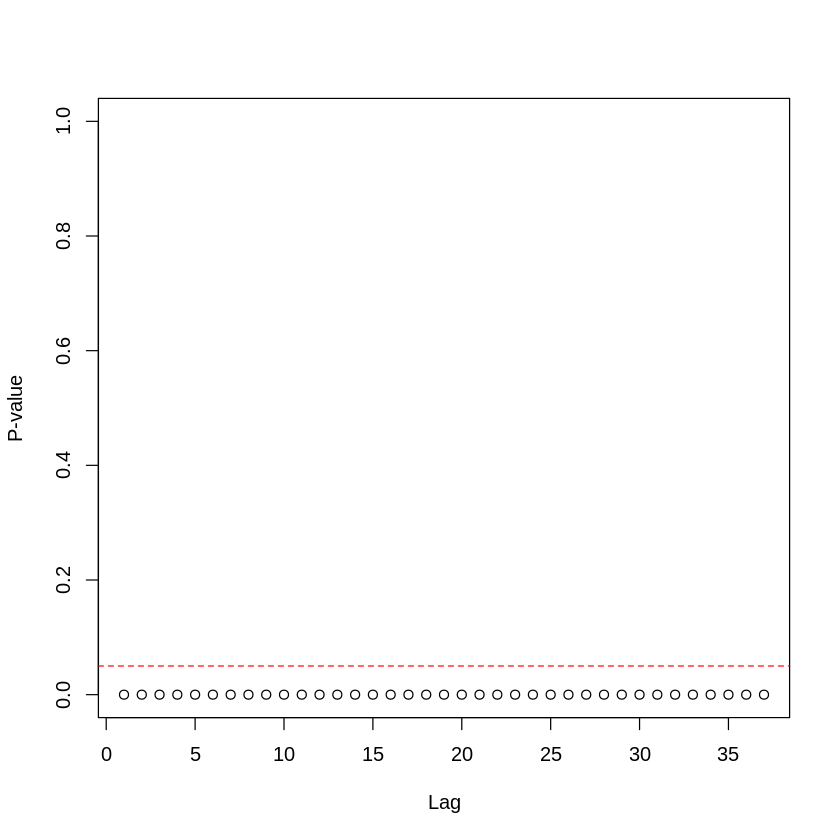

In [29]:
McLeod.Li.test(y = GSPTSE.df$GSPTSE.Return)
# p-valor < 1% => ARCH effect

**Lagrange Multiplier (LM) test for autoregressive conditional heteroscedasticity (ARCH)**

In [30]:
ArchTest(GSPTSE.df$GSPTSE.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  GSPTSE.df$GSPTSE.Return
Chi-squared = 1514.9, df = 12, p-value < 2.2e-16


## 6. GARCH model estimation

In [31]:
# Packages
install.packages('tidyverse')
install.packages('FinTS')
install.packages('texreg')
install.packages('rugarch')

library(tidyverse)
library(FinTS)
library(texreg)
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘nloptr’, ‘ks’, ‘spd’, ‘chron’, ‘SkewHyperbolic’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::combine()         masks gridExtra::combine()
✖ lubridate::date()        masks 

In [32]:
# Parameters definition
ar_lag <- 0
ma_lag <- 0
arch_lag <- 1
garch_lag <- 1

**Linear GARCH model**

In [33]:
# Specification 
garch.spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                               garchOrder = c(arch_lag, garch_lag)),
                         mean.model = list(armaOrder = c(ar_lag, ma_lag)),
                         distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [34]:
# Estimation
garch.fit <- ugarchfit(spec = garch.spec, data = GSPTSE.df$GSPTSE.Return)
round(garch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0398,0.0092,4.3098,0
omega,0.0083,0.0016,5.0791,0
alpha1,0.1026,0.0078,13.1296,0
beta1,0.8904,0.0079,112.9355,0
skew,0.7924,0.0146,54.4370,0


In [35]:
# Extracting variance series from the Linear GARCH model
var.garch <- ts(garch.fit@fit$sigma^2)
head(var.garch)

GSPTSE.df$GSPTSE.VolGARCH <- as.numeric(var.garch)
head(GSPTSE.df)

[1] 1.277901 1.261229 1.132384 2.475375 2.619771 2.717546

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH
2000-01-05       8119.4   -1.01948818        1.277901
2000-01-06       8114.2   -0.06406105        1.261229
2000-01-07       8429.4    3.81100042        1.132384
2000-01-10       8602.5    2.03272172        2.475375
2000-01-11       8442.6   -1.87625870        2.619771
2000-01-12       8360.0   -0.98318446        2.717546

**EGARCH model**

In [36]:
# Specification 
egarch.spec <- ugarchspec(variance.model = list(model = "eGARCH",
                                                garchOrder = c(arch_lag, garch_lag)),
                          mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                          distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [37]:
# Estimation
egarch.fit <- ugarchfit(spec = egarch.spec, data = GSPTSE.df$GSPTSE.Return)
round(egarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0166,0.0081,2.0355,0.0418
omega,-0.0033,0.0019,-1.7166,0.0861
alpha1,-0.0990,0.0070,-14.2139,0.0000
beta1,0.9834,0.0008,1284.2984,0.0000
gamma1,0.1512,0.0104,14.4987,0.0000
skew,0.7897,0.0147,53.7248,0.0000


In [38]:
# Extracting variance series from the EGARCH model
var.egarch <- ts(egarch.fit@fit$sigma^2)
head(var.egarch)

GSPTSE.df$GSPTSE.VolEGARCH <- as.numeric(var.egarch)
head(GSPTSE.df)

[1] 1.277354 1.413267 1.262294 1.324593 1.275901 1.706945

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475375         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275901
2000-01-12       8360.0   -0.98318446        2.717546         1.706945

**GJR-GARCH model**

In [39]:
# Specification 
gjrgarch.spec <- ugarchspec(variance.model = list(model = "gjrGARCH",
                                                  garchOrder = c(arch_lag, garch_lag)),
                            mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                            distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [40]:
# Estimation
gjrgarch.fit <- ugarchfit(spec = gjrgarch.spec, data = GSPTSE.df$GSPTSE.Return)
round(gjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0188,0.0095,1.9861,0.0470
omega,0.0109,0.0016,6.7205,0.0000
alpha1,0.0212,0.0074,2.8638,0.0042
beta1,0.9026,0.0071,126.5385,0.0000
gamma1,0.1211,0.0125,9.7168,0.0000
skew,0.7904,0.0146,54.0536,0.0000


In [41]:
# Extracting variance series from the GJR-GARCH model
var.gjrgarch <- ts(gjrgarch.fit@fit$sigma^2)
head(var.gjrgarch)

GSPTSE.df$GSPTSE.VolGJRGARCH <- as.numeric(var.gjrgarch)
head(GSPTSE.df)

[1] 1.277360 1.317148 1.200654 1.399601 1.360136 1.749434

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475375         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275901
2000-01-12       8360.0   -0.98318446        2.717546         1.706945
           GSPTSE.VolGJRGARCH
2000-01-05           1.277360
2000-01-06           1.317148
2000-01-07           1.200654
2000-01-10           1.399601
2000-01-11           1.360136
2000-01-12           1.749434

## 7. Realized GARCH model estimation

In [42]:
# Specification
realgarch.spec <- ugarchspec(mean.model = list(armaOrder = c(ar_lag, ma_lag),
                                               include.mean = FALSE),
                             variance.model = list(model = 'realGARCH',
                                                   garchOrder = c(arch_lag, garch_lag)),
                             distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution)

**Realized Linear GARCH**

In [43]:
# Estimation
realgarch.fit <- ugarchfit(realgarch.spec, GSPTSE.df$GSPTSE.Return,
                          solver = 'hybrid',
                          realizedVol = GSPTSE.df$GSPTSE.VolGARCH)
round(realgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0239,0.0200,1.1936,0.2326
alpha1,0.9799,0.0239,41.0069,0.0000
beta1,0.0092,0.0135,0.6783,0.4976
eta11,0.0018,0.0020,0.8968,0.3698
eta21,0.0062,0.0011,5.8835,0.0000
delta,0.9989,0.0203,49.2720,0.0000
lambda,0.1432,0.0014,103.7013,0.0000
skew,0.7880,0.0142,55.4566,0.0000
xi,-0.0289,0.0200,-1.4474,0.1478


In [44]:
# Extracting variance series from the Realized Linear GARCH model
var.realgarch <- ts(realgarch.fit@fit$sigma^2)
head(var.realgarch)

GSPTSE.df$GSPTSE.VolRealGARCH <- as.numeric(var.realgarch)
head(GSPTSE.df)

[1] 1.277624 1.305310 1.288874 1.159576 2.492904 2.653924

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475375         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275901
2000-01-12       8360.0   -0.98318446        2.717546         1.706945
           GSPTSE.VolGJRGARCH GSPTSE.VolRealGARCH
2000-01-05           1.277360            1.277624
2000-01-06           1.317148            1.305310
2000-01-07           1.200654            1.288874
2000-01-10           1.399601            1.159576
2000-01-11           1.360136            2.492904
2000-01-12           1.749434            2.653924

**Realized EGARCH**

In [45]:
# Estimation
realegarch.fit <- ugarchfit(realgarch.spec, GSPTSE.df$GSPTSE.Return,
                            solver = 'hybrid',
                            realizedVol = GSPTSE.df$GSPTSE.VolEGARCH)
round(realegarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0265,0.0201,1.3175,0.1877
alpha1,1.0000,0.0231,43.2784,0.0000
beta1,0.0000,0.0135,0.0000,1.0000
eta11,0.0013,0.0022,0.5944,0.5522
eta21,0.0096,0.0012,8.3053,0.0000
delta,0.9859,0.0185,53.1576,0.0000
lambda,0.1517,0.0015,103.6588,0.0000
skew,0.7873,0.0144,54.8250,0.0000
xi,-0.0320,0.0196,-1.6334,0.1024


In [46]:
# Extracting variance series from the Realized EGARCH model
var.realegarch <- ts(realegarch.fit@fit$sigma^2)
head(var.realegarch)

GSPTSE.df$GSPTSE.VolRealEGARCH <- as.numeric(var.realegarch)
head(GSPTSE.df)

[1] 1.277624 1.311710 1.451278 1.296245 1.360220 1.310218

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475375         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275901
2000-01-12       8360.0   -0.98318446        2.717546         1.706945
           GSPTSE.VolGJRGARCH GSPTSE.VolRealGARCH GSPTSE.VolRealEGARCH
2000-01-05           1.277360            1.277624             1.277624
2000-01-06           1.317148            1.305310             1.311710
2000-01-07           1.200654            1.288874             1.451278
2000-01-10           1.399601            1.159576             1.296245
2000-01-11           1.360136            2.492904             1.360220
2000-01-12           1.749434            2.653924             1.310218

**Realized GJR-GARCH**

In [47]:
# Estimation
realgjrgarch.fit <- ugarchfit(realgarch.spec, GSPTSE.df$GSPTSE.Return,
                              solver = 'hybrid',
                              realizedVol = GSPTSE.df$GSPTSE.VolGJRGARCH)
round(realgjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0175,0.0203,0.8649,0.3871
alpha1,0.9824,0.0238,41.3365,0.0000
beta1,0.0000,0.0136,0.0000,1.0000
eta11,0.0004,0.0023,0.1689,0.8658
eta21,0.0085,0.0012,7.1467,0.0000
delta,1.0031,0.0202,49.7028,0.0000
lambda,0.1581,0.0015,103.6769,0.0000
skew,0.7855,0.0144,54.6848,0.0000
xi,-0.0235,0.0201,-1.1685,0.2426


In [48]:
# Extracting variance series from the Realized GJR-GARCH model
var.realgjrgarch <- ts(realgjrgarch.fit@fit$sigma^2)
head(var.realgjrgarch)

GSPTSE.df$GSPTSE.VolRealGJRGARCH <- as.numeric(var.realgjrgarch)
head(GSPTSE.df)

[1] 1.277624 1.294355 1.333953 1.217954 1.415946 1.376713

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475375         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275901
2000-01-12       8360.0   -0.98318446        2.717546         1.706945
           GSPTSE.VolGJRGARCH GSPTSE.VolRealGARCH GSPTSE.VolRealEGARCH
2000-01-05           1.277360            1.277624             1.277624
2000-01-06           1.317148            1.305310             1.311710
2000-01-07           1.200654            1.288874             1.451278
2000-01-10           1.399601            1.159576             1.296245
2000-01-11           1.360136            2.492904             1.360220
2000-01-12           1.749434            2.653924             1.310218
      

## 8. Markov-Switching GARCH estimation

In [49]:
# Packages
install.packages('MSGARCH')

library(MSGARCH)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘expm’, ‘fanplot’




2 regimes: low volatility and high volatility

**Linear MS GARCH**

In [50]:
# Specification
msgarch.spec <- CreateSpec(variance.spec = list(model = c("sGARCH")),
                           distribution.spec = list(distribution = c("snorm")),
                           switch.spec = list(K = 2))

In [51]:
# Estimation
msgarch.fit <- FitML(msgarch.spec, data = GSPTSE.df$GSPTSE.Return)    
summary(msgarch.fit)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error      t value Pr(>|t|)
alpha0_1   0.0065          0 1.959882e+21   <1e-16
alpha1_1   0.0984          0 4.098684e+21   <1e-16
beta_1     0.8884          0 1.067124e+23   <1e-16
xi_1       0.8105          0 4.942121e+20   <1e-16
alpha0_2   0.6028          0 1.029478e+20   <1e-16
alpha1_2   0.3404          0 2.117715e+20   <1e-16
beta_2     0.6298          0 1.298514e+22   <1e-16
xi_2       0.1272          0 5.433100e+07   <1e-16
P_1_1      0.9610          0 1.062398e+24   <1e-16
P_2_1      0.9813          0 2.790766e+22   <1e-16
------------------------------------------
Tra

In [52]:
# Extracting variance series from the MS GARCH model
var.msgarch <- ts(Volatility(msgarch.fit))
head(var.msgarch)

GSPTSE.df$GSPTSE.VolMSGARCH <- as.numeric(var.msgarch)
head(GSPTSE.df)

t=1       t=2       t=3       t=4       t=5       t=6 
1.1183481 1.0256656 0.9133555 1.4325171 1.5335781 1.5512332

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475375         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275901
2000-01-12       8360.0   -0.98318446        2.717546         1.706945
           GSPTSE.VolGJRGARCH GSPTSE.VolRealGARCH GSPTSE.VolRealEGARCH
2000-01-05           1.277360            1.277624             1.277624
2000-01-06           1.317148            1.305310             1.311710
2000-01-07           1.200654            1.288874             1.451278
2000-01-10           1.399601            1.159576             1.296245
2000-01-11           1.360136            2.492904             1.360220
2000-01-12           1.749434            2.653924             1.310218
      

**MS EGARCH**

In [53]:
# Specification
msegarch.spec <- CreateSpec(variance.spec = list(model = c("eGARCH")),
                            distribution.spec = list(distribution = c("snorm")),
                            switch.spec = list(K = 2))

In [54]:
# Estimation
msegarch.fit <- FitML(msegarch.spec, data = GSPTSE.df$GSPTSE.Return)    
summary(msegarch.fit)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0123     0.0029  -4.2674 9.890e-06
alpha1_1   0.0890     0.0130   6.8243 4.417e-12
alpha2_1  -0.1143     0.0104 -11.0387    <1e-16
beta_1     0.9828     0.0027 367.3951    <1e-16
xi_1       0.7674     0.0209  36.7688    <1e-16
alpha0_2   0.0297     0.0063   4.6768 1.457e-06
alpha1_2   0.0862     0.0225   3.8278 6.464e-05
alpha2_2  -0.1678     0.0267  -6.2855 1.634e-10
beta_2     0.9804     0.0038 254.9361    <1e-16
xi_2       0.7478     0.0395  18.9436    <1e-16
P_1_1      0.9879     0.0216  45.8115    <1e-16
P_2_1      0.0528     0.0047  1

In [55]:
# Extracting variance series from the MS EGARCH model
var.msegarch <- ts(Volatility(msegarch.fit))
head(var.msegarch)

GSPTSE.df$GSPTSE.VolMSEGARCH <- as.numeric(var.msegarch)
head(GSPTSE.df)

t=1       t=2       t=3       t=4       t=5       t=6 
1.1170588 1.1806587 0.9516159 1.8626318 1.7263424 1.9122403

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475375         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275901
2000-01-12       8360.0   -0.98318446        2.717546         1.706945
           GSPTSE.VolGJRGARCH GSPTSE.VolRealGARCH GSPTSE.VolRealEGARCH
2000-01-05           1.277360            1.277624             1.277624
2000-01-06           1.317148            1.305310             1.311710
2000-01-07           1.200654            1.288874             1.451278
2000-01-10           1.399601            1.159576             1.296245
2000-01-11           1.360136            2.492904             1.360220
2000-01-12           1.749434            2.653924             1.310218
      

**MS GJR-GARCH**

In [56]:
# Specification
msgjrgarch.spec <- CreateSpec(variance.spec = list(model = c("gjrGARCH")),
                              distribution.spec = list(distribution = c("snorm")),
                              switch.spec = list(K = 2))

In [57]:
# Estimation
msgjrgarch.fit <- FitML(msgjrgarch.spec, data = GSPTSE.df$GSPTSE.Return)    
summary(msgjrgarch.fit)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error   t value  Pr(>|t|)
alpha0_1   0.0290     0.0073    3.9922 3.273e-05
alpha1_1   0.0000     0.0003    0.0731 4.708e-01
alpha2_1   0.1147     0.0292    3.9228 4.376e-05
beta_1     0.9005     0.0116   77.4223    <1e-16
xi_1       0.8159     0.0260   31.4395    <1e-16
alpha0_2   0.0069     0.0017    4.1421 1.721e-05
alpha1_2   0.0042     0.0117    0.3579 3.602e-01
alpha2_2   0.1532     0.0264    5.8127 3.074e-09
beta_2     0.9080     0.0024  379.9077    <1e-16
xi_2       0.7283     0.0198   36.8523    <1e-16
P_1_1      0.9987     0.0008 1271.0286    <1e-16
P_2_1      0.00

In [58]:
# Extracting variance series from the MS GJR-GARCH model
var.msgjrgarch <- ts(Volatility(msgjrgarch.fit))
head(var.msgjrgarch)

GSPTSE.df$GSPTSE.VolMSGJRGARCH <- as.numeric(var.msgjrgarch)
head(GSPTSE.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.951395 1.901329 1.479283 2.251500 2.151084 2.181982

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-05       8119.4   -1.01948818        1.277901         1.277354
2000-01-06       8114.2   -0.06406105        1.261229         1.413267
2000-01-07       8429.4    3.81100042        1.132384         1.262294
2000-01-10       8602.5    2.03272172        2.475375         1.324593
2000-01-11       8442.6   -1.87625870        2.619771         1.275901
2000-01-12       8360.0   -0.98318446        2.717546         1.706945
           GSPTSE.VolGJRGARCH GSPTSE.VolRealGARCH GSPTSE.VolRealEGARCH
2000-01-05           1.277360            1.277624             1.277624
2000-01-06           1.317148            1.305310             1.311710
2000-01-07           1.200654            1.288874             1.451278
2000-01-10           1.399601            1.159576             1.296245
2000-01-11           1.360136            2.492904             1.360220
2000-01-12           1.749434            2.653924             1.310218
      

## 9. Sample split: in-sample (70%) and out-sample (30%)

In [59]:
# Total number of lines 
nrow(GSPTSE.df)                

[1] 5377

In [60]:
# Cut-line
round(nrow(GSPTSE.df)*0.7, digits = 0)

[1] 3764

In [61]:
# In-sample
GSPTSE.df.in <- GSPTSE.df[1:round(nrow(GSPTSE.df)*0.7, digits = 0),]
dim(GSPTSE.df.in)

[1] 3764   11

In [62]:
# Out-sample
GSPTSE.df.out <- GSPTSE.df[(round(nrow(GSPTSE.df)*0.7, digits = 0)+1):nrow(GSPTSE.df),]
dim(GSPTSE.df.out)

[1] 1613   11

# 10. Forecast - GARCH models

In [63]:
# Packages
install.packages('Metrics')
install.packages('MLmetrics')
install.packages('multDM')
install.packages('MCS')
install.packages('sandwich')
install.packages('lmtest')
install.packages('forecast')

library(Metrics)
library(MLmetrics)
library(multDM)
library(MCS)
library(sandwich)
library(lmtest)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘fastICA’, ‘gss’, ‘stabledist’, ‘fGarch’, ‘fBasics’, ‘MTS’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 


Attaching package

## (a) Linear GARCH

**Forecast**

In [64]:
# Model specification
garch.spec.pred <- garch.spec
setfixed(garch.spec.pred) <- as.list(coef(garch.fit))

In [65]:
# Model adjustment
garch.fit.pred <- ugarchfit(garch.spec,
                            GSPTSE.df$GSPTSE.Return,
                            out.sample = dim(GSPTSE.df.out)[1])

In [66]:
# Forecast calculated through adjustment
garch.pred.a <- ugarchforecast(garch.fit.pred,
                               n.ahead = 1,
                               n.roll = dim(GSPTSE.df.out)[1])

garch.forecast.a <- xts(sigma(garch.pred.a)[1,],
                       move(as.Date(names(sigma(garch.pred.a)[1,])), by = 1))

In [67]:
# Forecast calculated using specification
garch.pred.b <- ugarchforecast(garch.spec.pred,
                               n.ahead = 1,
                               n.roll = dim(GSPTSE.df.out)[1],
                               data = GSPTSE.df$GSPTSE.Return,
                               out.sample = dim(GSPTSE.df.out)[1])

garch.forecast.b <- xts(sigma(garch.pred.b)[1,],
                        move(as.Date(names(sigma(garch.pred.b)[1,])), by = 1))  

In [68]:
# Model filtering
garch.filt.pred <- ugarchfilter(garch.spec.pred,
                                data = GSPTSE.df$GSPTSE.Return,
                                n.old = nrow(GSPTSE.df) - dim(GSPTSE.df.out)[1])

garch.filt <- tail(sigma(garch.filt.pred), dim(GSPTSE.df.out)[1])                                 

In [69]:
# Comparative
colnames(garch.filt) <- 'filter'
colnames(garch.forecast.a) <- 'forecast1'
colnames(garch.forecast.b) <- 'forecast2'

garch.ftest <- cbind(garch.filt,
                    garch.forecast.a,
                    garch.forecast.b)
head(round(garch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-23 1.1867    1.1484    1.1867
2014-12-24 1.1749    1.1417    1.1749
2014-12-29 1.1126    1.0967    1.1126
2014-12-30 1.0592    1.0575    1.0592
2014-12-31 1.0057    1.0179    1.0057
2015-01-02 0.9538    0.9788    0.9538

In [70]:
sigma.garch.pred.a <- ts(garch.forecast.a[-1,])
sigma.garch.pred.b <- ts(garch.forecast.b[-1,])
sigma.garch.true <- ts(GSPTSE.df.out$GSPTSE.VolGARCH)

sigma.garch <- na.omit(cbind(sigma.garch.pred.a, 
                            sigma.garch.pred.b,
                            sigma.garch.true))
head(sigma.garch)

,sigma.garch.pred.a,sigma.garch.pred.b,sigma.garch.true
1,1.1417401,1.1749362,1.4083002
2,1.0967059,1.1126044,1.3804751
3,1.0575472,1.0591901,1.2378886
4,1.0178842,1.0056969,1.1218837
5,0.9788430,0.9537881,1.0114263
6,0.9657027,0.9389404,0.9097118


**Performance evaluation**

In [71]:
# Forecast Error - Forecast a
garch.error.a <- sigma.garch[,'sigma.garch.pred.a'] - sigma.garch[,'sigma.garch.true']
head(garch.error.a)

A Time Series:
[1] -0.26656014 -0.28376914 -0.18034135 -0.10399944 -0.03258330  0.05599086

In [72]:
# Forecast Error - Forecast b
garch.error.b <- sigma.garch[,'sigma.garch.pred.b'] - sigma.garch[,'sigma.garch.true']
head(garch.error.b)

A Time Series:
[1] -0.23336403 -0.26787064 -0.17869848 -0.11618671 -0.05763821  0.02922863

In [73]:
# Mean Square Error Loss - Forecast a
garch.mse.a <- MSE(sigma.garch[,'sigma.garch.pred.a'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mse.a, digits = 3)     

[1] 10.631

In [74]:
# Mean Square Error Loss - Forecast b
garch.mse.b <- MSE(sigma.garch[,'sigma.garch.pred.b'],
                  sigma.garch[,'sigma.garch.true'])
round(garch.mse.b, digits = 3) 

[1] 10.419

In [75]:
# Mean Absolute Error Loss - Forecast a
garch.mae.a <- MAE(sigma.garch[,'sigma.garch.pred.a'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mae.a, digits = 3)

[1] 0.671

In [76]:
# Mean Absolute Error Loss - Forecast b
garch.mae.b <- MAE(sigma.garch[,'sigma.garch.pred.b'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mae.b, digits = 3)

[1] 0.654

In [77]:
# Root Mean Square Error Loss - Forecast a
garch.rmse.a <- RMSE(sigma.garch[,'sigma.garch.pred.a'], 
                    sigma.garch[,'sigma.garch.true'])
round(garch.rmse.a, digits = 3)

[1] 3.26

In [78]:
# Root Mean Square Error Loss - Forecast b
garch.rmse.b <- RMSE(sigma.garch[,'sigma.garch.pred.b'], 
                    sigma.garch[,'sigma.garch.true'])
round(garch.rmse.b, digits = 3)

[1] 3.228

In [79]:
# Quasi-likelihood loss function - forecast a
h <- sigma.garch[,'sigma.garch.true']

h.hat.a <- sigma.garch[,'sigma.garch.pred.a']     
garch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(garch.qlike.a, digits = 5) 

[1] 0.66638

In [80]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.garch[,'sigma.garch.pred.b']
garch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(garch.qlike.b, digits = 5)   

[1] 0.63206

In [81]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.garch[,'sigma.garch.pred.a']
f.b <- sigma.garch[,'sigma.garch.pred.b']
y <- sigma.garch[,'sigma.garch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 2.9802, forecast horizon = 1, p-value = 0.002881
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [82]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- garch.error.a
e.b <- garch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 2.9793, Forecast horizon = 1, Loss function power = 2, p-value =
0.002933
alternative hypothesis: two.sided


In [83]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
garch.qlike.a <- mean(LossVol(sigma.garch[,'sigma.garch.true'],
                              sigma.garch[,'sigma.garch.pred.a'],
                              which = "QLIKE"))
round(garch.qlike.a, digits = 3)

[1] 0.459

In [84]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
garch.qlike.b <- mean(LossVol(sigma.garch[,'sigma.garch.true'],
                              sigma.garch[,'sigma.garch.pred.b'],
                              which = "QLIKE"))
round(garch.qlike.b, digits = 3)

[1] 0.377

In [85]:
# Log loss / Cross-Entropy Loss -  forecast a
garch.logloss.a <- LogLoss(sigma.garch[,'sigma.garch.pred.a'],
                           sigma.garch[,'sigma.garch.true'])
round(garch.logloss.a, digits = 3)

[1] -19.703

In [86]:
# Log loss / Cross-Entropy Loss -  forecast b
garch.logloss.b <- LogLoss(sigma.garch[,'sigma.garch.pred.b'],
                           sigma.garch[,'sigma.garch.true'])
round(garch.logloss.b, digits = 3)

[1] -19.725

In [87]:
# Linear regression to assess forecast performance - forecast a
garch.model.a <- lm(sigma.garch.true ~ sigma.garch.pred.a, 
                    data = sigma.garch)
round(coeftest(garch.model.a, NeweyWest(garch.model.a,
                                        lag = bwNeweyWest(garch.model.a),
                                        prewhite = F)), 3)
round(summary(garch.model.a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -3.327      0.416  -7.992 < 2.2e-16 ***
sigma.garch.pred.a    5.429      0.578   9.399 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.843

In [88]:
# Linear regression to assess forecast performance - forecast b
garch.model.b <- lm(sigma.garch.true ~ sigma.garch.pred.b, 
                    data = sigma.garch)
round(coeftest(garch.model.b, NeweyWest(garch.model.b,
                                        lag = bwNeweyWest(garch.model.b),
                                        prewhite = F)), 3)
round(summary(garch.model.b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -3.119      0.439  -7.101 < 2.2e-16 ***
sigma.garch.pred.b    5.286      0.620   8.526 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.867

##(b) EGARCH

**Forecast**

In [89]:
# Model specification
egarch.spec.pred <- egarch.spec
setfixed(egarch.spec.pred) <- as.list(coef(egarch.fit))

In [90]:
# Model adjustment
egarch.fit.pred <- ugarchfit(egarch.spec,
                             GSPTSE.df$GSPTSE.Return,
                             out.sample = dim(GSPTSE.df.out)[1])

In [91]:
# Forecast calculated through adjustment
egarch.pred.a <- ugarchforecast(egarch.fit.pred,
                                n.ahead = 1,
                                n.roll = dim(GSPTSE.df.out)[1])

egarch.forecast.a <- xts(sigma(egarch.pred.a)[1,],
                         move(as.Date(names(sigma(egarch.pred.a)[1,])), by = 1))

In [93]:
# Forecast calculated using specification
egarch.pred.b <- ugarchforecast(egarch.spec.pred,
                                n.ahead = 1,
                                n.roll = dim(GSPTSE.df.out)[1],
                                data = GSPTSE.df$GSPTSE.Return,
                                out.sample = dim(GSPTSE.df.out)[1])

egarch.forecast.b <- xts(sigma(egarch.pred.b)[1,],
                         move(as.Date(names(sigma(egarch.pred.b)[1,])), by = 1))               

In [94]:
# Model filtering
egarch.filt.pred <- ugarchfilter(egarch.spec.pred,
                                data = GSPTSE.df$GSPTSE.Return,
                                n.old = nrow(GSPTSE.df) - dim(GSPTSE.df.out)[1])

egarch.filt <- tail(sigma(egarch.filt.pred), dim(GSPTSE.df.out)[1]) 

In [95]:
# Comparative
colnames(egarch.filt) <- 'filter'
colnames(egarch.forecast.a) <- 'forecast1'
colnames(egarch.forecast.b) <- 'forecast2'

egarch.ftest <- cbind(egarch.filt, 
                      egarch.forecast.a,
                      egarch.forecast.b)
head(round(egarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-23 1.1087    1.1092    1.1087
2014-12-24 1.0674    1.0755    1.0674
2014-12-29 1.0042    1.0266    1.0042
2014-12-30 0.9524    0.9851    0.9524
2014-12-31 0.9172    0.9577    0.9172
2015-01-02 0.8713    0.9214    0.8713

In [96]:
sigma.egarch.pred.a <- ts(egarch.forecast.a[-1,])
sigma.egarch.pred.b <- ts(egarch.forecast.b[-1,])
sigma.egarch.true <- ts(GSPTSE.df.out$GSPTSE.VolEGARCH)

sigma.egarch <- na.omit(cbind(sigma.egarch.pred.a,
                              sigma.egarch.pred.b,
                              sigma.egarch.true))
head(sigma.egarch)

,sigma.egarch.pred.a,sigma.egarch.pred.b,sigma.egarch.true
1,1.0755363,1.0673682,1.2292304
2,1.0265672,1.0041808,1.1392750
3,0.9850908,0.9524381,1.0083790
4,0.9577433,0.9172194,0.9071384
5,0.9213903,0.8713419,0.8412914
6,0.8938721,0.8408866,0.7592368


**Performance evaluation**

In [97]:
# Forecast Error - Forecast a
egarch.error.a <- sigma.egarch[,'sigma.egarch.pred.a'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error.a)

A Time Series:
[1] -0.15369415 -0.11270775 -0.02328822  0.05060491  0.08009888  0.13463534

In [98]:
# Forecast Error - Forecast b
egarch.error.b <- sigma.egarch[,'sigma.egarch.pred.b'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error.b)

A Time Series:
[1] -0.16186220 -0.13509419 -0.05594091  0.01008102  0.03005051  0.08164981

In [99]:
# Mean Square Error Loss - Forecast a
egarch.mse.a <- MSE(sigma.egarch[,'sigma.egarch.pred.a'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse.a, digits = 3)     

[1] 5.543

In [100]:
# Mean Square Error Loss - Forecast b
egarch.mse.b <- MSE(sigma.egarch[,'sigma.egarch.pred.b'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse.b, digits = 3) 

[1] 5.345

In [101]:
# Mean Absolute Error Loss - Forecast a
egarch.mae.a <- MAE(sigma.egarch[,'sigma.egarch.pred.a'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae.a, digits = 3)

[1] 0.528

In [102]:
# Mean Absolute Error Loss - Forecast b
egarch.mae.b <- MAE(sigma.egarch[,'sigma.egarch.pred.b'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae.b, digits = 3)

[1] 0.508

In [103]:
# Root Mean Square Error Loss - Forecast a
egarch.rmse.a <- RMSE(sigma.egarch[,'sigma.egarch.pred.a'],
                      sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse.a, digits = 3)

[1] 2.354

In [104]:
# Root Mean Square Error Loss - Forecast b
egarch.rmse.b <- RMSE(sigma.egarch[,'sigma.egarch.pred.b'],
                      sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse.b, digits = 3)

[1] 2.312

In [105]:
# Quasi-likelihood loss function - forecast a
h <- sigma.egarch[,'sigma.egarch.true']

h.hat.a <- sigma.egarch[,'sigma.egarch.pred.a']     
egarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(egarch.qlike.a, digits = 5) 

[1] 0.67101

In [106]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.egarch[,'sigma.egarch.pred.b']
egarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(egarch.qlike.b, digits = 5) 

[1] 0.6377

In [107]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.egarch[,'sigma.egarch.pred.a']
f.b <- sigma.egarch[,'sigma.egarch.pred.b']
y <- sigma.egarch[,'sigma.egarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 3.277, forecast horizon = 1, p-value = 0.001049
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [108]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- egarch.error.a
e.b <- egarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 3.2759, Forecast horizon = 1, Loss function power = 2, p-value =
0.001075
alternative hypothesis: two.sided


In [109]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
egarch.qlike.a <- mean(LossVol(sigma.egarch[,'sigma.egarch.true'],
                              sigma.egarch[,'sigma.egarch.pred.a'],
                              which = "QLIKE"))
round(egarch.qlike.a, digits = 3)

[1] 0.337

In [110]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
egarch.qlike.b <- mean(LossVol(sigma.egarch[,'sigma.egarch.true'],
                              sigma.egarch[,'sigma.egarch.pred.b'],
                              which = "QLIKE"))
round(egarch.qlike.b, digits = 3)

[1] 0.245

In [111]:
# Log loss / Cross-Entropy Loss -  forecast a
egarch.logloss.a <- LogLoss(sigma.egarch[,'sigma.egarch.pred.a'],
                            sigma.egarch[,'sigma.egarch.true'])
round(egarch.logloss.a, digits = 3)

[1] -14.198

In [112]:
# Log loss / Cross-Entropy Loss -  forecast b
egarch.logloss.b <- LogLoss(sigma.egarch[,'sigma.egarch.pred.b'],
                            sigma.egarch[,'sigma.egarch.true'])
round(egarch.logloss.b, digits = 3)

[1] -14.234

In [113]:
# Linear regression to assess forecast performance - forecast a
egarch.model.a <- lm(sigma.egarch.true ~ sigma.egarch.pred.a, 
                    data = sigma.egarch)
round(coeftest(egarch.model.a, NeweyWest(egarch.model.a,
                                        lag = bwNeweyWest(egarch.model.a),
                                        prewhite = F)), 3)
round(summary(egarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.847      0.637  -4.472 < 2.2e-16 ***
sigma.egarch.pred.a    4.731      0.867   5.458 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.803

In [114]:
# Linear regression to assess forecast performance - forecast b
egarch.model.b <- lm(sigma.egarch.true ~ sigma.egarch.pred.b, 
                    data = sigma.egarch)
round(coeftest(egarch.model.b, NeweyWest(egarch.model.b,
                                        lag = bwNeweyWest(egarch.model.b),
                                        prewhite = F)), 3)
round(summary(egarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.588      0.499  -5.189 < 2.2e-16 ***
sigma.egarch.pred.b    4.491      0.688   6.528 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.831

##(c) GJR-GARCH

**Forecast**

In [115]:
# Model specification
gjrgarch.spec.pred <- gjrgarch.spec
setfixed(gjrgarch.spec.pred) <- as.list(coef(gjrgarch.fit))

In [116]:
# Model adjustment
gjrgarch.fit.pred <- ugarchfit(gjrgarch.spec,
                              GSPTSE.df$GSPTSE.Return,
                              out.sample = dim(GSPTSE.df.out)[1])

In [117]:
# Forecast calculated through adjustment
gjrgarch.pred.a <- ugarchforecast(gjrgarch.fit.pred,
                                 n.ahead = 1,
                                 n.roll = dim(GSPTSE.df.out)[1])

gjrgarch.forecast.a <- xts(sigma(gjrgarch.pred.a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred.a)[1,])), by = 1))

In [118]:
# Forecast calculated using specification
gjrgarch.pred.b <- ugarchforecast(gjrgarch.spec.pred,
                                  n.ahead = 1,
                                  n.roll = dim(GSPTSE.df.out)[1],
                                  data = GSPTSE.df$GSPTSE.Return,
                                  out.sample = dim(GSPTSE.df.out)[1])

gjrgarch.forecast.b <- xts(sigma(gjrgarch.pred.b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred.b)[1,])), by = 1)) 

In [119]:
# Model filtering
gjrgarch.filt.pred <- ugarchfilter(gjrgarch.spec.pred,
                                   data = GSPTSE.df$GSPTSE.Return,
                                   n.old = nrow(GSPTSE.df) - dim(GSPTSE.df.out)[1])

gjrgarch.filt <- tail(sigma(gjrgarch.filt.pred), dim(GSPTSE.df.out)[1]) 

In [120]:
# Comparative
colnames(gjrgarch.filt) <- 'filter'
colnames(gjrgarch.forecast.a) <- 'forecast1'
colnames(gjrgarch.forecast.b) <- 'forecast2'

gjrgarch.ftest <- cbind(gjrgarch.filt, 
                        gjrgarch.forecast.a,
                        gjrgarch.forecast.b)
head(round(gjrgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-23 1.1226    1.1096    1.1226
2014-12-24 1.0834    1.0773    1.0834
2014-12-29 1.0346    1.0403    1.0346
2014-12-30 0.9898    1.0056    0.9898
2014-12-31 0.9486    0.9738    0.9486
2015-01-02 0.9076    0.9418    0.9076

In [121]:
sigma.gjrgarch.pred.a <- ts(gjrgarch.forecast.a[-1,])
sigma.gjrgarch.pred.b <- ts(gjrgarch.forecast.b[-1,])
sigma.gjrgarch.true <- ts(GSPTSE.df.out$GSPTSE.VolGJRGARCH)

sigma.gjrgarch <- na.omit(cbind(sigma.gjrgarch.pred.a,
                                sigma.gjrgarch.pred.b,
                                sigma.gjrgarch.true))
head(sigma.gjrgarch)

,sigma.gjrgarch.pred.a,sigma.gjrgarch.pred.b,sigma.gjrgarch.true
1,1.0773017,1.0834201,1.2603124
2,1.0403014,1.0346260,1.1737992
3,1.0056275,0.9897862,1.0704510
4,0.9738172,0.9485744,0.9796768
5,0.9418375,0.9075767,0.8997934
6,0.9149614,0.8764170,0.8236954


**Performance evaluation**

In [122]:
# Forecast Error - Forecast a
gjrgarch.error.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a'] - sigma.gjrgarch[,'sigma.gjrgarch.true']
head(gjrgarch.error.a)

A Time Series:
[1] -0.183010622 -0.133497754 -0.064823467 -0.005859601  0.042044119
[6]  0.091265965

In [123]:
# Forecast Error - Forecast b
gjrgarch.error.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b'] - sigma.gjrgarch[,'sigma.gjrgarch.true']
head(gjrgarch.error.b)

A Time Series:
[1] -0.176892222 -0.139173158 -0.080664789 -0.031102372  0.007783302
[6]  0.052721516

In [124]:
# Mean Square Error Loss - Forecast a
gjrgarch.mse.a <- MSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mse.a, digits = 3)     

[1] 13.071

In [125]:
# Mean Square Error Loss - Forecast b
gjrgarch.mse.b <- MSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mse.b, digits = 3) 

[1] 12.823

In [126]:
# Mean Absolute Error Loss - Forecast a
gjrgarch.mae.a <- MAE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mae.a, digits = 3)

[1] 0.725

In [127]:
# Mean Absolute Error Loss - Forecast b
gjrgarch.mae.b <- MAE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mae.b, digits = 3)

[1] 0.697

In [128]:
# Root Mean Square Error Loss - Forecast a
gjrgarch.rmse.a <- RMSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                        sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.rmse.a, digits = 3)

[1] 3.615

In [129]:
# Root Mean Square Error Loss - Forecast b
gjrgarch.rmse.b <- RMSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                        sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.rmse.b, digits = 3)

[1] 3.581

In [130]:
# Quasi-likelihood loss function - forecast a
h <- sigma.gjrgarch[,'sigma.gjrgarch.true']

h.hat.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a']     
gjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(gjrgarch.qlike.a, digits = 5) 

[1] 0.70384

In [131]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b']
gjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(gjrgarch.qlike.b, digits = 5) 

[1] 0.65158

In [132]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a']
f.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b']
y <- sigma.gjrgarch[,'sigma.gjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 3.2185, forecast horizon = 1, p-value = 0.001289
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [133]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- gjrgarch.error.a
e.b <- gjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 3.2175, Forecast horizon = 1, Loss function power = 2, p-value =
0.001319
alternative hypothesis: two.sided


In [134]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
gjrgarch.qlike.a <- mean(LossVol(sigma.gjrgarch[,'sigma.gjrgarch.true'],
                                 sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                                 which = "QLIKE"))
round(gjrgarch.qlike.a, digits = 3)

[1] 0.591

In [135]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
gjrgarch.qlike.b <- mean(LossVol(sigma.gjrgarch[,'sigma.gjrgarch.true'],
                                 sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                                 which = "QLIKE"))
round(gjrgarch.qlike.b, digits = 3)

[1] 0.481

In [136]:
# Log loss / Cross-Entropy Loss -  forecast a
gjrgarch.logloss.a <- LogLoss(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                              sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.logloss.a, digits = 3)

[1] -21.388

In [137]:
# Log loss / Cross-Entropy Loss -  forecast b
gjrgarch.logloss.b <- LogLoss(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                              sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.logloss.b, digits = 3)

[1] -21.399

In [138]:
# Linear regression to assess forecast performance - forecast a
gjrgarch.model.a <- lm(sigma.gjrgarch.true ~ sigma.gjrgarch.pred.a, 
                      data = sigma.gjrgarch)
round(coeftest(gjrgarch.model.a, NeweyWest(gjrgarch.model.a,
                                          lag = bwNeweyWest(gjrgarch.model.a),
                                          prewhite = F)), 3)
round(summary(gjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.703      0.659  -5.618 < 2.2e-16 ***
sigma.gjrgarch.pred.a    5.785      0.878   6.590 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.843

In [139]:
# Linear regression to assess forecast performance - forecast b
gjrgarch.model.b <- lm(sigma.gjrgarch.true ~ sigma.gjrgarch.pred.b, 
                      data = sigma.gjrgarch)
round(coeftest(gjrgarch.model.b, NeweyWest(gjrgarch.model.b,
                                          lag = bwNeweyWest(gjrgarch.model.b),
                                          prewhite = F)), 3)
round(summary(gjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.368      0.525  -6.420 < 2.2e-16 ***
sigma.gjrgarch.pred.b    5.567      0.715   7.786 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.86

#11. Forecast - Realized GARCH models

##(a) Realized Linear GARCH

**Forecast**

In [140]:
# Model specification
realgarch.spec.pred <- realgarch.spec
setfixed(realgarch.spec.pred) <- as.list(coef(realgarch.fit))

In [141]:
# Model adjustment
realgarch.fit.pred <- ugarchfit(realgarch.spec,
                                GSPTSE.df$GSPTSE.Return,
                                out.sample = dim(GSPTSE.df.out)[1],
                                solver = 'hybrid',
                                realizedVol = GSPTSE.df$GSPTSE.VolGARCH)

In [142]:
# Forecast calculated through adjustment
realgarch.pred.a <- ugarchforecast(realgarch.fit.pred,
                                   n.ahead = 1,
                                   n.roll = dim(GSPTSE.df.out)[1])

realgarch.forecast.a <- xts(sigma(realgarch.pred.a)[1,],
                            move(as.Date(names(sigma(realgarch.pred.a)[1,])), by = 1))

In [143]:
# Forecast calculated using specification
realgarch.pred.b <- ugarchforecast(realgarch.spec.pred, 
                                   n.ahead = 1, 
                                   n.roll = dim(GSPTSE.df.out)[1], 
                                   data = GSPTSE.df$GSPTSE.Return, 
                                   out.sample = dim(GSPTSE.df.out)[1], 
                                   realizedVol = GSPTSE.df$GSPTSE.VolRealGARCH)

realgarch.forecast.b <- xts(sigma(realgarch.pred.b)[1,],
                            move(as.Date(names(sigma(realgarch.pred.b)[1,])), by = 1))

In [145]:
# Model filtering
realgarch.filt.pred <- ugarchfilter(realgarch.spec.pred,
                                    data = GSPTSE.df$GSPTSE.Return,
                                    n.old = nrow(GSPTSE.df) - dim(GSPTSE.df.out)[1],
                                    realizedVol = GSPTSE.df$GSPTSE.VolRealGARCH)

realgarch.filt <- tail(sigma(realgarch.filt.pred), dim(GSPTSE.df.out)[1])

In [146]:
# Comparative
colnames(realgarch.filt) <- 'filter'
colnames(realgarch.forecast.a) <- 'forecast1'
colnames(realgarch.forecast.b) <- 'forecast2'

realgarch.ftest <- cbind(realgarch.filt,
                        realgarch.forecast.a,
                        realgarch.forecast.b)
head(round(realgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-23 1.3175    1.2397    1.3021
2014-12-24 1.2750    1.1779    1.2523
2014-12-29 1.2121    1.1700    1.1960
2014-12-30 1.1995    1.1091    1.1835
2014-12-31 1.1381    1.0577    1.1228
2015-01-02 1.0845    1.0094    1.0692

In [147]:
sigma.realgarch.pred.a <- ts(realgarch.forecast.a[-1,])
sigma.realgarch.pred.b <- ts(realgarch.forecast.b[-1,])
sigma.realgarch.true <- ts(GSPTSE.df.out$GSPTSE.VolRealGARCH)

sigma.realgarch <- na.omit(cbind(sigma.realgarch.pred.a,
                                sigma.realgarch.pred.b,
                                sigma.realgarch.true))
head(sigma.realgarch)

,sigma.realgarch.pred.a,sigma.realgarch.pred.b,sigma.realgarch.true
1,1.177935,1.252332,1.594064
2,1.170044,1.195995,1.438625
3,1.109052,1.183493,1.409437
4,1.057723,1.122845,1.266390
5,1.009421,1.069236,1.148853
6,0.954505,1.015887,1.036969


**Performance evaluation**

In [148]:
# Forecast Error - Forecast a
realgarch.error.a <- sigma.realgarch[,'sigma.realgarch.pred.a'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error.a)

A Time Series:
[1] -0.41612941 -0.26858124 -0.30038499 -0.20866677 -0.13943154 -0.08246412

In [149]:
# Forecast Error - Forecast b
realgarch.error.b <- sigma.realgarch[,'sigma.realgarch.pred.b'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error.b)

A Time Series:
[1] -0.34173188 -0.24263092 -0.22594368 -0.14354409 -0.07961674 -0.02108185

In [150]:
# Mean Square Error Loss - Forecast a
realgarch.mse.a <- MSE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse.a, digits = 3)

[1] 10.398

In [151]:
# Mean Square Error Loss - Forecast b
realgarch.mse.b <- MSE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse.b, digits = 3)

[1] 10.137

In [152]:
# Mean Absolute Error Loss - Forecast a
realgarch.mae.a <- MAE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae.a, digits = 3)

[1] 0.661

In [153]:
# Mean Absolute Error Loss - Forecast b
realgarch.mae.b <- MAE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae.b, digits = 3)

[1] 0.647

In [154]:
# Root Mean Square Error Loss - Forecast a
realgarch.rmse.a <- RMSE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                        sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse.a, digits = 3)

[1] 3.225

In [155]:
# Root Mean Square Error Loss - Forecast b
realgarch.rmse.b <- RMSE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                        sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse.b, digits = 3)

[1] 3.184

In [156]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realgarch[,'sigma.realgarch.true']

h.hat.a <- sigma.realgarch[,'sigma.realgarch.pred.a']     
realgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realgarch.qlike.a, digits = 5)

[1] 0.64892

In [157]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realgarch[,'sigma.realgarch.pred.b']
realgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realgarch.qlike.b, digits = 5)

[1] 0.648

In [158]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realgarch[,'sigma.realgarch.pred.a']
f.b <- sigma.realgarch[,'sigma.realgarch.pred.b']
y <- sigma.realgarch[,'sigma.realgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 3.6535, forecast horizon = 1, p-value = 0.0002587
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [159]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realgarch.error.a
e.b <- realgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 3.6523, Forecast horizon = 1, Loss function power = 2, p-value =
0.0002682
alternative hypothesis: two.sided


In [160]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realgarch.qlike.a <- mean(LossVol(sigma.realgarch[,'sigma.realgarch.true'],
                                  sigma.realgarch[,'sigma.realgarch.pred.a'],
                                  which = "QLIKE"))
round(realgarch.qlike.a, digits = 3)

[1] 0.508

In [161]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
realgarch.qlike.b <- mean(LossVol(sigma.realgarch[,'sigma.realgarch.true'],
                                  sigma.realgarch[,'sigma.realgarch.pred.b'],
                                  which = "QLIKE"))
round(realgarch.qlike.b, digits = 3)

[1] 0.42

In [162]:
# Log loss / Cross-Entropy Loss -  forecast a
realgarch.logloss.a <- LogLoss(sigma.realgarch[,'sigma.realgarch.pred.a'],
                              sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.logloss.a, digits = 3)

[1] -19.675

In [163]:
# Log loss / Cross-Entropy Loss -  forecast b
realgarch.logloss.b <- LogLoss(sigma.realgarch[,'sigma.realgarch.pred.b'],
                              sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.logloss.b, digits = 3)

[1] -19.756

In [164]:
# Linear regression to assess forecast performance - forecast a
realgarch.model.a <- lm(sigma.realgarch.true ~ sigma.realgarch.pred.a,
                        data = sigma.realgarch)
round(coeftest(realgarch.model.a, NeweyWest(realgarch.model.a,
                                            lag = bwNeweyWest(realgarch.model.a),
                                            prewhite = F)), 3)
round(summary(realgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -3.394      0.443  -7.659 < 2.2e-16 ***
sigma.realgarch.pred.a    5.633      0.620   9.087 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.86

In [165]:
# Linear regression to assess forecast performance - forecast b
realgarch.model.b <- lm(sigma.realgarch.true ~ sigma.realgarch.pred.b,
                        data = sigma.realgarch)
round(coeftest(realgarch.model.b, NeweyWest(realgarch.model.b,
                                            lag = bwNeweyWest(realgarch.model.b),
                                            prewhite = F)), 3)
round(summary(realgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -3.258      0.519  -6.279 < 2.2e-16 ***
sigma.realgarch.pred.b    5.411      0.713   7.584 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.883

##(b) Realized EGARCH

**Forecast**

In [166]:
# Model specification
realegarch.spec.pred <- realgarch.spec
setfixed(realegarch.spec.pred) <- as.list(coef(realegarch.fit))

In [167]:
# Model adjustment
realegarch.fit.pred <- ugarchfit(realgarch.spec,
                                 GSPTSE.df$GSPTSE.Return,
                                 out.sample = dim(GSPTSE.df.out)[1],
                                 solver = 'hybrid',
                                 realizedVol = GSPTSE.df$GSPTSE.VolEGARCH)

In [168]:
# Forecast calculated through adjustment
realegarch.pred.a <- ugarchforecast(realegarch.fit.pred,
                                    n.ahead = 1,
                                    n.roll = dim(GSPTSE.df.out)[1])

realegarch.forecast.a <- xts(sigma(realegarch.pred.a)[1,],
                             move(as.Date(names(sigma(realegarch.pred.a)[1,])), by = 1))

In [169]:
# Forecast calculated using specification
realegarch.pred.b <- ugarchforecast(realegarch.spec.pred, 
                                   n.ahead = 1, 
                                   n.roll = dim(GSPTSE.df.out)[1], 
                                   data = GSPTSE.df$GSPTSE.Return, 
                                   out.sample = dim(GSPTSE.df.out)[1], 
                                   realizedVol = GSPTSE.df$GSPTSE.VolRealEGARCH)

realegarch.forecast.b <- xts(sigma(realegarch.pred.b)[1,],
                             move(as.Date(names(sigma(realegarch.pred.b)[1,])), by = 1))

In [170]:
# Model filtering
realegarch.filt.pred <- ugarchfilter(realegarch.spec.pred,
                                     data = GSPTSE.df$GSPTSE.Return,
                                     n.old = nrow(GSPTSE.df) - dim(GSPTSE.df.out)[1],
                                     realizedVol = GSPTSE.df$GSPTSE.VolRealEGARCH)

realegarch.filt <- tail(sigma(realegarch.filt.pred), dim(GSPTSE.df.out)[1])

In [171]:
# Comparative
colnames(realegarch.filt) <- 'filter'
colnames(realegarch.forecast.a) <- 'forecast1'
colnames(realegarch.forecast.b) <- 'forecast2'

realegarch.ftest <- cbind(realegarch.filt,
                         realegarch.forecast.a,
                         realegarch.forecast.b)
head(round(realegarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-23 1.2368    1.1425    1.2155
2014-12-24 1.1797    1.1041    1.1603
2014-12-29 1.1385    1.0603    1.1169
2014-12-30 1.0961    1.0013    1.0770
2014-12-31 1.0312    0.9516    1.0130
2015-01-02 0.9781    0.9142    0.9639

In [172]:
sigma.realegarch.pred.a <- ts(realegarch.forecast.a[-1,])
sigma.realegarch.pred.b <- ts(realegarch.forecast.b[-1,])
sigma.realegarch.true <- ts(GSPTSE.df.out$GSPTSE.VolRealEGARCH)

sigma.realegarch <- na.omit(cbind(sigma.realegarch.pred.a,
                                 sigma.realegarch.pred.b,
                                 sigma.realegarch.true))
head(sigma.realegarch)

,sigma.realegarch.pred.a,sigma.realegarch.pred.b,sigma.realegarch.true
1,1.1041356,1.1602745,1.3552904
2,1.0602687,1.1169366,1.2622921
3,1.0013312,1.0769907,1.1699173
4,0.9515991,1.0130122,1.0355009
5,0.9141595,0.9639379,0.9315373
6,0.8755182,0.9232588,0.8639194


**Performance evaluation**

In [173]:
# Forecast Error - Forecast a
realegarch.error.a <- sigma.realegarch[,'sigma.realegarch.pred.a'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error.a)

A Time Series:
[1] -0.25115485 -0.20202341 -0.16858603 -0.08390182 -0.01737782  0.01159881

In [174]:
# Forecast Error - Forecast b
realegarch.error.b <- sigma.realegarch[,'sigma.realegarch.pred.b'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error.b)

A Time Series:
[1] -0.19501589 -0.14535554 -0.09292656 -0.02248869  0.03240057  0.05933936

In [175]:
# Mean Square Error Loss - Forecast a
realegarch.mse.a <- MSE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse.a, digits = 3)

[1] 5.891

In [176]:
# Mean Square Error Loss - Forecast b
realegarch.mse.b <- MSE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse.b, digits = 3)

[1] 5.629

In [177]:
# Mean Absolute Error Loss - Forecast a
realegarch.mae.a <- MAE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae.a, digits = 3)

[1] 0.53

In [178]:
# Mean Absolute Error Loss - Forecast b
realegarch.mae.b <- MAE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae.b, digits = 3)

[1] 0.511

In [179]:
# Root Mean Square Error Loss - Forecast a
realegarch.rmse.a <- RMSE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                          sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse.a, digits = 3)

[1] 2.427

In [180]:
# Root Mean Square Error Loss - Forecast b
realegarch.rmse.b <- RMSE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                         sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse.b, digits = 3)

[1] 2.373

In [181]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realegarch[,'sigma.realegarch.true']

h.hat.a <- sigma.realegarch[,'sigma.realegarch.pred.a']     
realegarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realegarch.qlike.a, digits = 5)

[1] 0.65172

In [182]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realegarch[,'sigma.realegarch.pred.b']
realegarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realegarch.qlike.b, digits = 5)

[1] 0.64583

In [183]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realegarch[,'sigma.realegarch.pred.a']
f.b <- sigma.realegarch[,'sigma.realegarch.pred.b']
y <- sigma.realegarch[,'sigma.realegarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 3.4241, forecast horizon = 1, p-value = 0.0006169
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [184]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realegarch.error.a
e.b <- realegarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 3.423, Forecast horizon = 1, Loss function power = 2, p-value =
0.0006348
alternative hypothesis: two.sided


In [185]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realegarch.qlike.a <- mean(LossVol(sigma.realegarch[,'sigma.realegarch.true'],
                                  sigma.realegarch[,'sigma.realegarch.pred.a'],
                                  which = "QLIKE"))
round(realegarch.qlike.a, digits = 3)

[1] 0.378

In [186]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
realegarch.qlike.b <- mean(LossVol(sigma.realegarch[,'sigma.realegarch.true'],
                                  sigma.realegarch[,'sigma.realegarch.pred.b'],
                                  which = "QLIKE"))
round(realegarch.qlike.b, digits = 3)

[1] 0.27

In [187]:
# Log loss / Cross-Entropy Loss -  forecast a
realegarch.logloss.a <- LogLoss(sigma.realegarch[,'sigma.realegarch.pred.a'],
                                sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.logloss.a, digits = 3)

[1] -14.799

In [188]:
# Log loss / Cross-Entropy Loss -  forecast b
realegarch.logloss.b <- LogLoss(sigma.realegarch[,'sigma.realegarch.pred.b'],
                               sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.logloss.b, digits = 3)

[1] -14.887

In [189]:
# Linear regression to assess forecast performance - forecast a
realegarch.model.a <- lm(sigma.realegarch.true ~ sigma.realegarch.pred.a,
                          data = sigma.realegarch)
round(coeftest(realegarch.model.a, NeweyWest(realegarch.model.a,
                                            lag = bwNeweyWest(realegarch.model.a),
                                            prewhite = F)), 3)
round(summary(realegarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)               -2.896      0.587  -4.930 < 2.2e-16 ***
sigma.realegarch.pred.a    4.905      0.806   6.086 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.818

In [190]:
# Linear regression to assess forecast performance - forecast b
realegarch.model.b <- lm(sigma.realegarch.true ~ sigma.realegarch.pred.b,
                         data = sigma.realegarch)
round(coeftest(realegarch.model.b, NeweyWest(realegarch.model.b,
                                             lag = bwNeweyWest(realegarch.model.b),
                                             prewhite = F)), 3)
round(summary(realegarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)               -2.718      0.524  -5.183 < 2.2e-16 ***
sigma.realegarch.pred.b    4.638      0.716   6.475 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.859

##(c) Realized GJR-GARCH

**Forecast**

In [191]:
# Model specification
realgjrgarch.spec.pred <- realgarch.spec
setfixed(realgjrgarch.spec.pred) <- as.list(coef(realgjrgarch.fit))

In [192]:
# Model adjustment
realgjrgarch.fit.pred <- ugarchfit(realgarch.spec,
                                  GSPTSE.df$GSPTSE.Return,
                                  out.sample = dim(GSPTSE.df.out)[1],
                                  solver = 'hybrid',
                                  realizedVol = GSPTSE.df$GSPTSE.VolGJRGARCH)

In [193]:
# Forecast calculated through adjustment
realgjrgarch.pred.a <- ugarchforecast(realgjrgarch.fit.pred,
                                      n.ahead = 1,
                                      n.roll = dim(GSPTSE.df.out)[1])

realgjrgarch.forecast.a <- xts(sigma(realgjrgarch.pred.a)[1,],
                              move(as.Date(names(sigma(realgjrgarch.pred.a)[1,])), by = 1))

In [194]:
# Forecast calculated using specification
realgjrgarch.pred.b <- ugarchforecast(realgjrgarch.spec.pred, 
                                     n.ahead = 1, 
                                     n.roll = dim(GSPTSE.df.out)[1], 
                                     data = GSPTSE.df$GSPTSE.Return, 
                                     out.sample = dim(GSPTSE.df.out)[1], 
                                     realizedVol = GSPTSE.df$GSPTSE.VolRealGJRGARCH)

realgjrgarch.forecast.b <- xts(sigma(realgjrgarch.pred.b)[1,],
                               move(as.Date(names(sigma(realgjrgarch.pred.b)[1,])), by = 1))

In [195]:
# Model filtering
realgjrgarch.filt.pred <- ugarchfilter(realgjrgarch.spec.pred,
                                      data = GSPTSE.df$GSPTSE.Return,
                                      n.old = nrow(GSPTSE.df) - dim(GSPTSE.df.out)[1],
                                      realizedVol = GSPTSE.df$GSPTSE.VolRealGJRGARCH)

realgjrgarch.filt <- tail(sigma(realgjrgarch.filt.pred), dim(GSPTSE.df.out)[1])

In [196]:
# Comparative
colnames(realgjrgarch.filt) <- 'filter'
colnames(realgjrgarch.forecast.a) <- 'forecast1'
colnames(realgjrgarch.forecast.b) <- 'forecast2'

realgjrgarch.ftest <- cbind(realgjrgarch.filt,
                            realgjrgarch.forecast.a,
                            realgjrgarch.forecast.b)
head(round(realgjrgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-23 1.2347    1.1567    1.2238
2014-12-24 1.1857    1.1092    1.1711
2014-12-29 1.1377    1.0718    1.1279
2014-12-30 1.0993    1.0295    1.0900
2014-12-31 1.0515    0.9879    1.0412
2015-01-02 1.0075    0.9493    0.9948

In [197]:
sigma.realgjrgarch.pred.a <- ts(realgjrgarch.forecast.a[-1,])
sigma.realgjrgarch.pred.b <- ts(realgjrgarch.forecast.b[-1,])
sigma.realgjrgarch.true <- ts(GSPTSE.df.out$GSPTSE.VolRealGJRGARCH)

sigma.realgjrgarch <- na.omit(cbind(sigma.realgjrgarch.pred.a,
                                    sigma.realgjrgarch.pred.b,
                                    sigma.realgjrgarch.true))
head(sigma.realgjrgarch)

,sigma.realgjrgarch.pred.a,sigma.realgjrgarch.pred.b,sigma.realgjrgarch.true
1,1.1091957,1.1710607,1.3895732
2,1.0717518,1.1279093,1.2773820
3,1.0294875,1.0900362,1.1911848
4,0.9878780,1.0411607,1.0880667
5,0.9492646,0.9947622,0.9973505
6,0.9131324,0.9534502,0.9173963


**Performance evaluation**

In [198]:
# Forecast Error - Forecast a
realgjrgarch.error.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'] - sigma.realgjrgarch[,'sigma.realgjrgarch.true']
head(realgjrgarch.error.a)

A Time Series:
[1] -0.280377496 -0.205630127 -0.161697295 -0.100188681 -0.048085918
[6] -0.004263907

In [199]:
# Forecast Error - Forecast b
realgjrgarch.error.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'] - sigma.realgjrgarch[,'sigma.realgjrgarch.true']
head(realgjrgarch.error.b)

A Time Series:
[1] -0.21851252 -0.14947266 -0.10114852 -0.04690601 -0.00258837  0.03605390

In [200]:
# Mean Square Error Loss - Forecast a
realgjrgarch.mse.a <- MSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mse.a, digits = 3)

[1] 12.062

In [201]:
# Mean Square Error Loss - Forecast b
realgjrgarch.mse.b <- MSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mse.b, digits = 3)

[1] 11.688

In [202]:
# Mean Absolute Error Loss - Forecast a
realgjrgarch.mae.a <- MAE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mae.a, digits = 3)

[1] 0.694

In [203]:
# Mean Absolute Error Loss - Forecast b
realgjrgarch.mae.b <- MAE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mae.b, digits = 3)

[1] 0.674

In [204]:
# Root Mean Square Error Loss - Forecast a
realgjrgarch.rmse.a <- RMSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                            sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.rmse.a, digits = 3)

[1] 3.473

In [205]:
# Root Mean Square Error Loss - Forecast b
realgjrgarch.rmse.b <- RMSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                            sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.rmse.b, digits = 3)

[1] 3.419

In [206]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realgjrgarch[,'sigma.realgjrgarch.true']

h.hat.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a']     
realgjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realgjrgarch.qlike.a, digits = 5)

[1] 0.67438

In [207]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b']
realgjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realgjrgarch.qlike.b, digits = 5)

[1] 0.66714

In [208]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a']
f.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b']
y <- sigma.realgjrgarch[,'sigma.realgjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 3.8462, forecast horizon = 1, p-value = 0.00012
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [209]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realgjrgarch.error.a
e.b <- realgjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 3.845, Forecast horizon = 1, Loss function power = 2, p-value =
0.0001252
alternative hypothesis: two.sided


In [210]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realgjrgarch.qlike.a <- mean(LossVol(sigma.realgjrgarch[,'sigma.realgjrgarch.true'],
                                    sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                                    which = "QLIKE"))
round(realgjrgarch.qlike.a, digits = 3)

[1] 0.64

In [211]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
realgjrgarch.qlike.b <- mean(LossVol(sigma.realgjrgarch[,'sigma.realgjrgarch.true'],
                                    sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                                    which = "QLIKE"))
round(realgjrgarch.qlike.b, digits = 3)

[1] 0.512

In [212]:
# Log loss / Cross-Entropy Loss -  forecast a
realgjrgarch.logloss.a <- LogLoss(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                                  sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.logloss.a, digits = 3)

[1] -20.67

In [213]:
# Log loss / Cross-Entropy Loss -  forecast b
realgjrgarch.logloss.b <- LogLoss(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                                  sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.logloss.b, digits = 3)

[1] -20.79

In [214]:
# Linear regression to assess forecast performance - forecast a
realgjrgarch.model.a <- lm(sigma.realgjrgarch.true ~ sigma.realgjrgarch.pred.a,
                          data = sigma.realgjrgarch)
round(coeftest(realgjrgarch.model.a, NeweyWest(realgjrgarch.model.a,
                                              lag = bwNeweyWest(realgjrgarch.model.a),
                                              prewhite = F)), 3)
round(summary(realgjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                 -3.727      0.624  -5.970 < 2.2e-16 ***
sigma.realgjrgarch.pred.a    5.993      0.844   7.103 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.846

In [215]:
# Linear regression to assess forecast performance - forecast b
realgjrgarch.model.b <- lm(sigma.realgjrgarch.true ~ sigma.realgjrgarch.pred.b,
                          data = sigma.realgjrgarch)
round(coeftest(realgjrgarch.model.b, NeweyWest(realgjrgarch.model.b,
                                              lag = bwNeweyWest(realgjrgarch.model.b),
                                              prewhite = F)), 3)
round(summary(realgjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                 -3.514      0.553  -6.353 < 2.2e-16 ***
sigma.realgjrgarch.pred.b    5.693      0.750   7.593 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.879

#12. Forecast - Markov-Switching GARCH

##(a) MS Linear GARCH

In [216]:
# Model Estimation - Maximum Likelihood Estimation
msgarch.fit.pred.a <- FitML(msgarch.spec,
                            data = GSPTSE.df$GSPTSE.Return)

In [217]:
# Model Estimation - MCMC/Bayesian estimation
msgarch.fit.pred.b <- FitMCMC(msgarch.spec,
                              data = GSPTSE.df$GSPTSE.Return)

In [218]:
# Forecast - Maximum Likelihood Estimation
msgarch.pred.a <- predict(object = msgarch.fit.pred.a,
                          nahead = dim(GSPTSE.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.a <- ts(msgarch.pred.a$vol)

In [219]:
# Forecast - MCMC/Bayesian estimation
msgarch.pred.b <- predict(object = msgarch.fit.pred.b,
                          nahead = dim(GSPTSE.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.b <- ts(msgarch.pred.b$vol)

In [220]:
# Comparative
sigma.msgarch.pred.a <- msgarch.forecast.a
sigma.msgarch.pred.b <- msgarch.forecast.b
sigma.msgarch.true <- ts(GSPTSE.df.out[,'GSPTSE.VolMSGARCH'])

sigma.msgarch <- na.omit(cbind(sigma.msgarch.pred.a,
                              sigma.msgarch.pred.b,
                              sigma.msgarch.true))
head(sigma.msgarch)

,sigma.msgarch.pred.a,sigma.msgarch.pred.b,sigma.msgarch.true
1,0.6237967,0.5957005,1.1725532
2,0.6318633,0.6248301,1.1652202
3,0.6423807,0.6092952,1.1002554
4,0.6450471,0.6538488,1.0473765
5,0.6430116,0.6455160,0.9930071
6,0.6534424,0.6448407,0.9415597


**Performance evaluation**

In [221]:
# Forecast Error - Forecast a
msgarch.error.a <- sigma.msgarch[,'sigma.msgarch.pred.a'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.a)

A Time Series:
[1] -0.5487566 -0.5333569 -0.4578747 -0.4023294 -0.3499955 -0.2881173

In [222]:
# Forecast Error - Forecast b
msgarch.error.b <- sigma.msgarch[,'sigma.msgarch.pred.b'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.b)

A Time Series:
[1] -0.5768527 -0.5403900 -0.4909602 -0.3935277 -0.3474910 -0.2967190

In [223]:
# Mean Square Error Loss - Forecast a
msgarch.mse.a <- MSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.a, digits = 3)

[1] 0.457

In [224]:
# Mean Square Error Loss - Forecast b
msgarch.mse.b <- MSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.b, digits = 3)

[1] 0.623

In [225]:
# Mean Absolute Error Loss - Forecast a
msgarch.mae.a <- MAE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.a, digits = 3)

[1] 0.42

In [226]:
# Mean Absolute Error Loss - Forecast b
msgarch.mae.b <- MAE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.b, digits = 3)

[1] 0.619

In [227]:
# Root Mean Square Error Loss - Forecast a
msgarch.rmse.a <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.a, digits = 3)

[1] 0.676

In [228]:
# Root Mean Square Error Loss - Forecast b
msgarch.rmse.b <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.b, digits = 3)

[1] 0.789

In [229]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgarch[,'sigma.msgarch.true']

h.hat.a <- sigma.msgarch[,'sigma.msgarch.pred.a']     
msgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgarch.qlike.a, digits = 5)

[1] 1.03093

In [230]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
msgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgarch.qlike.b, digits = 5)

[1] 1.33986

In [231]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgarch[,'sigma.msgarch.pred.a']
f.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
y <- sigma.msgarch[,'sigma.msgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -9.6033, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [232]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgarch.error.a
e.b <- msgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -9.6003, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [233]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgarch.qlike.a <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.a'],
                                which = "QLIKE"))
round(msgarch.qlike.a, digits = 3)

[1] 1.075

In [234]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgarch.qlike.b <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.b'],
                                which = "QLIKE"))
round(msgarch.qlike.b, digits = 3)

[1] 1.071

In [235]:
# Log loss / Cross-Entropy Loss -  forecast a
msgarch.logloss.a <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.a'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.a, digits = 3)

[1] 4.151

In [236]:
# Log loss / Cross-Entropy Loss -  forecast b
msgarch.logloss.b <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.b'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.b, digits = 3)

[1] 5.84

In [237]:
# Linear regression to assess forecast performance - forecast a
msgarch.model.a <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.a,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.a, NeweyWest(msgarch.model.a,
                                          lag = bwNeweyWest(msgarch.model.a),
                                          prewhite = F)), 3)
round(summary(msgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)             1.010      0.437   2.312    0.021 *
sigma.msgarch.pred.a   -0.200      0.482  -0.416    0.677  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0

In [238]:
# Linear regression to assess forecast performance - forecast b
msgarch.model.b <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.b,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.b, NeweyWest(msgarch.model.b,
                                          lag = bwNeweyWest(msgarch.model.b),
                                          prewhite = F)), 3)
round(summary(msgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value Pr(>|t|)
(Intercept)             0.326      0.432   0.755    0.450
sigma.msgarch.pred.b    0.388      0.389   0.997    0.319


[1] 0.017

##(b) MS EGARCH

**Forecast**

In [239]:
# Model Estimation - Maximum Likelihood Estimation
msegarch.fit.pred.a <- FitML(msegarch.spec,
                             data = GSPTSE.df$GSPTSE.Return)

In [240]:
# Model Estimation - MCMC/Bayesian estimation
msegarch.fit.pred.b <- FitMCMC(msegarch.spec,
                               data = GSPTSE.df$GSPTSE.Return)

In [241]:
# Forecast - Maximum Likelihood Estimation
msegarch.pred.a <- predict(object = msegarch.fit.pred.a,
                           nahead = dim(GSPTSE.df.out)[1],
                           do.return.draw = TRUE)

msegarch.forecast.a <- ts(msegarch.pred.a$vol)

In [242]:
# Forecast - MCMC/Bayesian estimation
msegarch.pred.b <- predict(object = msegarch.fit.pred.b,
                          nahead = dim(GSPTSE.df.out)[1],
                          do.return.draw = TRUE)

msegarch.forecast.b <- ts(msegarch.pred.b$vol)

In [243]:
# Comparative
sigma.msegarch.pred.a <- msegarch.forecast.a
sigma.msegarch.pred.b <- msegarch.forecast.b
sigma.msegarch.true <- ts(GSPTSE.df.out[,'GSPTSE.VolMSEGARCH'])

sigma.msegarch <- na.omit(cbind(sigma.msegarch.pred.a,
                                sigma.msegarch.pred.b,
                                sigma.msegarch.true))
head(sigma.msegarch)

,sigma.msegarch.pred.a,sigma.msegarch.pred.b,sigma.msegarch.true
1,0.4932973,0.4812743,1.0744632
2,0.5063963,0.5263806,1.0163144
3,0.5122184,0.5285263,0.9579534
4,0.5203486,0.5541206,0.9035613
5,0.5236276,0.5527915,0.8785067
6,0.5443310,0.5796952,0.8453790


**Performance evaluation**

In [244]:
# Forecast Error - Forecast a
msegarch.error.a <- sigma.msegarch[,'sigma.msegarch.pred.a'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.a)

A Time Series:
[1] -0.5811660 -0.5099181 -0.4457350 -0.3832127 -0.3548791 -0.3010480

In [245]:
# Forecast Error - Forecast b
msegarch.error.b <- sigma.msegarch[,'sigma.msegarch.pred.b'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.b)

A Time Series:
[1] -0.5931889 -0.4899339 -0.4294271 -0.3494407 -0.3257153 -0.2656838

In [246]:
# Mean Square Error Loss - Forecast a
msegarch.mse.a <- MSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.a, digits = 3)

[1] 0.473

In [247]:
# Mean Square Error Loss - Forecast b
msegarch.mse.b <- MSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.b, digits = 3)

[1] 0.512

In [248]:
# Mean Absolute Error Loss - Forecast a
msegarch.mae.a <- MAE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.a, digits = 3)

[1] 0.522

In [249]:
# Mean Absolute Error Loss - Forecast b
msegarch.mae.b <- MAE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.b, digits = 3)

[1] 0.568

In [250]:
# Root Mean Square Error Loss - Forecast a
msegarch.rmse.a <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.a, digits = 3)

[1] 0.688

In [251]:
# Root Mean Square Error Loss - Forecast b
msegarch.rmse.b <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.b, digits = 3)

[1] 0.715

In [252]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msegarch[,'sigma.msegarch.true']

h.hat.a <- sigma.msegarch[,'sigma.msegarch.pred.a']     
msegarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msegarch.qlike.a, digits = 5)

[1] 1.21153

In [253]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
msegarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msegarch.qlike.b, digits = 5)

[1] 1.29385

In [254]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msegarch[,'sigma.msegarch.pred.a']
f.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
y <- sigma.msegarch[,'sigma.msegarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -8.162, forecast horizon = 1, p-value = 2.22e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [255]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msegarch.error.a
e.b <- msegarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -8.1594, Forecast horizon = 1, Loss function power = 2, p-value =
6.705e-16
alternative hypothesis: two.sided


In [256]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msegarch.qlike.a <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.a'],
                                 which = "QLIKE"))
round(msegarch.qlike.a, digits = 3)

[1] 1.01

In [257]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msegarch.qlike.b <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.b'],
                                 which = "QLIKE"))
round(msegarch.qlike.b, digits = 3)

[1] 1.002

In [258]:
# Log loss / Cross-Entropy Loss -  forecast a
msegarch.logloss.a <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.a'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.a, digits = 3)

[1] 7.051

In [259]:
# Log loss / Cross-Entropy Loss -  forecast b
msegarch.logloss.b <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.b'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.b, digits = 3)

[1] 7.252

In [260]:
# Linear regression to assess forecast performance - forecast a
msegarch.model.a <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.a,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.a, NeweyWest(msegarch.model.a,
                                           lag = bwNeweyWest(msegarch.model.a),
                                           prewhite = F)), 3)
round(summary(msegarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.009      0.207   4.864   <2e-16 ***
sigma.msegarch.pred.a   -0.197      0.206  -0.960    0.337    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0

In [261]:
# Linear regression to assess forecast performance - forecast b
msegarch.model.b <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.b,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.b, NeweyWest(msegarch.model.b,
                                           lag = bwNeweyWest(msegarch.model.b),
                                           prewhite = F)), 3)
round(summary(msegarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)
(Intercept)              0.063      0.716   0.088    0.930
sigma.msegarch.pred.b    0.602      0.629   0.957    0.339


[1] 0.012

##(c) MS GJR-GARCH

**Forecast**

In [262]:
# Model Estimation - Maximum Likelihood Estimation
msgjrgarch.fit.pred.a <- FitML(msgjrgarch.spec,
                                data = GSPTSE.df$GSPTSE.Return)

In [263]:
# Model Estimation - MCMC/Bayesian estimation
msgjrgarch.fit.pred.b <- FitMCMC(msgjrgarch.spec,
                                 data = GSPTSE.df$GSPTSE.Return)

In [264]:
# Forecast - Maximum Likelihood Estimation
msgjrgarch.pred.a <- predict(object = msgjrgarch.fit.pred.a,
                            nahead = dim(GSPTSE.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.a <- ts(msgjrgarch.pred.a$vol)

In [265]:
# Forecast - MCMC/Bayesian estimation
msgjrgarch.pred.b <- predict(object = msgjrgarch.fit.pred.b,
                            nahead = dim(GSPTSE.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.b <- ts(msgjrgarch.pred.b$vol)

In [266]:
# Comparative
sigma.msgjrgarch.pred.a <- msgjrgarch.forecast.a
sigma.msgjrgarch.pred.b <- msgjrgarch.forecast.b
sigma.msgjrgarch.true <- ts(GSPTSE.df.out[,'GSPTSE.VolMSGJRGARCH'])

sigma.msgjrgarch <- na.omit(cbind(sigma.msgjrgarch.pred.a,
                                  sigma.msgjrgarch.pred.b,
                                  sigma.msgjrgarch.true))
head(sigma.msgjrgarch)

,sigma.msgjrgarch.pred.a,sigma.msgjrgarch.pred.b,sigma.msgjrgarch.true
1,0.5748804,0.5265346,1.1126429
2,0.5907180,0.5397228,1.0665041
3,0.5974959,0.5619566,1.0196564
4,0.6108021,0.5453132,0.9756650
5,0.6206665,0.6129729,0.9358398
6,0.6209051,0.5822943,0.8962559


**Performance evaluation**

In [267]:
# Forecast Error - Forecast a
msgjrgarch.error.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.a)

A Time Series:
[1] -0.5377625 -0.4757862 -0.4221605 -0.3648629 -0.3151733 -0.2753508

In [268]:
# Forecast Error - Forecast b
msgjrgarch.error.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.b)

A Time Series:
[1] -0.5861083 -0.5267813 -0.4576998 -0.4303518 -0.3228669 -0.3139616

In [269]:
# Mean Square Error Loss - Forecast a
msgjrgarch.mse.a <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.a, digits = 3)

[1] 0.601

In [270]:
# Mean Square Error Loss - Forecast b
msgjrgarch.mse.b <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.b, digits = 3)

[1] 0.806

In [271]:
# Mean Absolute Error Loss - Forecast a
msgjrgarch.mae.a <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.a, digits = 3)

[1] 0.59

In [272]:
# Mean Absolute Error Loss - Forecast b
msgjrgarch.mae.b <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.b, digits = 3)

[1] 0.649

In [273]:
# Root Mean Square Error Loss - Forecast a
msgjrgarch.rmse.a <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.a, digits = 3)

[1] 0.775

In [274]:
# Root Mean Square Error Loss - Forecast b
msgjrgarch.rmse.b <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.b, digits = 3)

[1] 0.898

In [275]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

h.hat.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']     
msgjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgjrgarch.qlike.a, digits = 5)

[1] 1.28848

In [276]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
msgjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgjrgarch.qlike.b, digits = 5)

[1] 1.32486

In [277]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']
f.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
y <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -5.4973, forecast horizon = 1, p-value = 3.856e-08
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [278]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgjrgarch.error.a
e.b <- msgjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -5.4956, Forecast horizon = 1, Loss function power = 2, p-value =
4.518e-08
alternative hypothesis: two.sided


In [279]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgjrgarch.qlike.a <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                    sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                    which = "QLIKE"))
round(msgjrgarch.qlike.a, digits = 3)

[1] 0.951

In [280]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgjrgarch.qlike.b <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                  sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                  which = "QLIKE"))
round(msgjrgarch.qlike.b, digits = 3)

[1] 1.297

In [281]:
# Log loss / Cross-Entropy Loss -  forecast a
msgjrgarch.logloss.a <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.a, digits = 3)

[1] 6.558

In [282]:
# Log loss / Cross-Entropy Loss -  forecast b
msgjrgarch.logloss.b <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.b, digits = 3)

[1] 6.404

In [283]:
# Linear regression to assess forecast performance - forecast a
msgjrgarch.model.a <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.a,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.a, NeweyWest(msgjrgarch.model.a,
                                            lag = bwNeweyWest(msgjrgarch.model.a),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)               -0.482      0.695  -0.694    0.488  
sigma.msgjrgarch.pred.a    1.069      0.623   1.715    0.087 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.171

In [284]:
# Linear regression to assess forecast performance - forecast b
msgjrgarch.model.b <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.b,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.b, NeweyWest(msgjrgarch.model.b,
                                            lag = bwNeweyWest(msgjrgarch.model.b),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.309      0.249   5.252   <2e-16 ***
sigma.msgjrgarch.pred.b   -0.425      0.155  -2.742    0.006 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.019

#13. Monthly volatility

##(a) Transformation of a daily frequency to monthly frequency

In [285]:
GSPTSE.df.month <- apply.monthly(GSPTSE.df, FUN = mean)
head(GSPTSE.df.month)

           GSPTSE.Close GSPTSE.Return GSPTSE.VolGARCH GSPTSE.VolEGARCH
2000-01-31     8469.979    0.17573149        1.918533         1.455882
2000-02-29     9185.962    0.35055261        2.212796         1.510536
2000-03-31     9582.752    0.15595623        1.748115         1.478742
2000-04-28     9145.632   -0.06424478        4.119719         3.680151
2000-05-31     9296.591   -0.04672654        3.725866         3.092563
2000-06-30     9952.873    0.44139410        2.265517         1.655499
           GSPTSE.VolGJRGARCH GSPTSE.VolRealGARCH GSPTSE.VolRealEGARCH
2000-01-31           1.437241            1.897183             1.447322
2000-02-29           1.623104            2.284779             1.585058
2000-03-31           1.302945            1.724641             1.461409
2000-04-28           4.302526            4.011998             3.723685
2000-05-31           3.517269            3.838062             3.220887
2000-06-30           1.688992            2.407584             1.772352
      

##(b) Lag Length Selection

In [286]:
# Package
install.packages('tsDyn')

library(tsDyn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘deSolve’, ‘strucchange’, ‘iterators’, ‘mnormt’, ‘tseriesChaos’, ‘vars’, ‘foreach’



Attaching package: ‘tsDyn’


The following object is masked from ‘package:MLmetrics’:

    MAPE


The following object is masked from ‘package:Metrics’:

    mse




In [287]:
lags.select(GSPTSE.df.month$GSPTSE.VolGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 1 
Best HQ :  lag= 2 

In [288]:
lags.select(GSPTSE.df.month$GSPTSE.VolEGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [289]:
lags.select(GSPTSE.df.month$GSPTSE.VolGJRGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [290]:
lags.select(GSPTSE.df.month$GSPTSE.VolRealGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 2 
Best HQ :  lag= 2 

In [291]:
lags.select(GSPTSE.df.month$GSPTSE.VolRealEGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [292]:
lags.select(GSPTSE.df.month$GSPTSE.VolRealGJRGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 1 
Best HQ :  lag= 2 

In [293]:
lags.select(GSPTSE.df.month$GSPTSE.VolMSGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 1 
Best HQ :  lag= 2 

In [294]:
lags.select(GSPTSE.df.month$GSPTSE.VolMSEGARCH , lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [295]:
lags.select(GSPTSE.df.month$GSPTSE.VolMSGJRGARCH , lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 1 
Best HQ :  lag= 2 

##(c) Import dataset

**EPU**

In [ ]:
# Package
library(readxl)

In [ ]:
EPU <- read_excel("EPU_All_Country_Data.xlsx",
                  sheet = "Import",
                  col_types = c("date", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric"))
head(EPU)

MM.YYYY,GEPU_current,Brazil,Russia,India,Chile,Mexico,China,Canada,France,Germany,Japan,UK,US
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-01,63.43916,54.60320,117.12624,55.47412,104.18382,161.02013,44.004440,46.92811,18.45134,73.23399,78.12204,30.08247,88.98869
2000-02-01,58.77943,41.26398,27.02751,58.04263,76.43725,157.84093,9.066709,45.72284,33.22514,97.35842,78.62767,36.62590,73.36520
2000-03-01,61.33933,73.60725,27.27277,63.43669,78.59699,90.80582,44.399136,39.32267,42.40266,96.09151,79.74557,45.16381,73.29862
2000-04-01,64.76240,96.34906,25.90913,78.92112,63.72873,93.59448,35.441414,53.17447,16.59283,69.44795,103.12970,42.74244,70.59975
2000-05-01,86.84892,189.96852,42.97606,59.61799,120.89192,136.35007,71.135803,54.20769,55.37305,135.28714,86.34306,53.87834,118.14321
2000-06-01,88.23903,106.87265,115.94142,110.34407,156.83112,216.03893,36.856976,45.04951,35.07029,58.29012,150.85790,51.15050,109.58423


In [ ]:
attach(EPU)

**VIX**

In [ ]:
getSymbols("^VIX", from = '2000-01-01', to = '2021-05-31', periodicity = "monthly")

[1] "^VIX"

In [ ]:
head(VIX)

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2000-01-01    24.36    29.00   19.51     24.95          0        24.95
2000-02-01    24.43    28.12   20.69     23.37          0        23.37
2000-03-01    22.65    25.87   19.19     24.11          0        24.11
2000-04-01    24.99    34.31   23.25     26.20          0        26.20
2000-05-01    26.07    32.89   23.23     23.65          0        23.65
2000-06-01    23.20    25.01   19.39     19.54          0        19.54

In [ ]:
VIX <- na.omit(VIX)

##(d) Estimation

**Benchmark model**

In [ ]:
# Concatenate (number of rows of data frames aren't different)
uncertainty <- cbind(VIX[,'VIX.Close'], EPU$Brazil, EPU$GEPU_current)
head(uncertainty)

           VIX.Close EPU.Brazil EPU.GEPU_current
2000-01-01     24.95   54.60320         63.43916
2000-02-01     23.37   41.26398         58.77943
2000-03-01     24.11   73.60725         61.33933
2000-04-01     26.20   96.34906         64.76240
2000-05-01     23.65  189.96852         86.84892
2000-06-01     19.54  106.87265         88.23903

In [ ]:
# Lag of uncertainty variables (lag = 1)
lag.epu <- ts(Lag(uncertainty$EPU.Brazil, 1))
lag.gepu <- ts(Lag(uncertainty$EPU.GEPU_current, 1))
lag.vix <- ts(Lag(uncertainty$VIX.Close, 1))

**Linear GARCH**

In [ ]:
# Estimation 1 - GARCH (Best BIC:  lag= 2)
garch <- ts(log(BVSP.df.month$BVSP.VolGARCH))
lag.garch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolGARCH), 1))
lag.garch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolGARCH), 2))

ols.garch <- cbind(garch, lag.garch.1, lag.garch.2, 
                  lag.epu, lag.gepu, lag.vix)

model.garch.1 <- lm(garch ~  lag.garch.1 + lag.garch.2, 
                    data = ols.garch)

round(coeftest(model.garch.1, NeweyWest(model.garch.1, 
                                        lag = bwNeweyWest(model.garch.1), 
                                        prewhite = F)), 3)

round(summary(model.garch.1)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.285      0.051   5.631   <2e-16 ***
lag.garch.1    0.834      0.073  11.397   <2e-16 ***
lag.garch.2   -0.132      0.069  -1.919    0.056 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.545

In [ ]:
# Estimation 2 - GARCH (Best BIC:  lag= 2)
model.garch.2 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.epu, 
                    data = ols.garch)

round(coeftest(model.garch.2, NeweyWest(model.garch.2, 
                                        lag = bwNeweyWest(model.garch.2), 
                                        prewhite = F)), 3)

round(summary(model.garch.2)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.296      0.061   4.832   <2e-16 ***
lag.garch.1    0.837      0.079  10.645   <2e-16 ***
lag.garch.2   -0.133      0.070  -1.892    0.060 .  
lag.epu        0.000      0.000  -0.480    0.632    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.544

In [ ]:
# Estimation 3 - GARCH (Best BIC:  lag= 2)
model.garch.3 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.3, NeweyWest(model.garch.3, 
                                        lag = bwNeweyWest(model.garch.3), 
                                        prewhite = F)), 3)

round(summary(model.garch.3)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.096      0.049   1.963    0.051 .  
lag.garch.1    0.645      0.082   7.857   <2e-16 ***
lag.garch.2   -0.168      0.060  -2.811    0.005 ** 
lag.vix        0.020      0.006   3.559   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.605

In [ ]:
# Estimation 4 - GARCH (Best BIC:  lag= 2)
model.garch.4 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.epu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.4, NeweyWest(model.garch.4, 
                                        lag = bwNeweyWest(model.garch.4), 
                                        prewhite = F)), 3)

round(summary(model.garch.4)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.092      0.061   1.499    0.135    
lag.garch.1    0.644      0.086   7.506   <2e-16 ***
lag.garch.2   -0.167      0.059  -2.852    0.005 ** 
lag.epu        0.000      0.000   0.119    0.906    
lag.vix        0.020      0.006   3.532   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.603

In [ ]:
# Estimation 5 - GARCH (Best BIC:  lag= 2)
model.garch.5 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.epu + lag.gepu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.5, NeweyWest(model.garch.5, 
                                        lag = bwNeweyWest(model.garch.5), 
                                        prewhite = F)), 3)

round(summary(model.garch.5)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.157      0.066   2.390    0.018 *  
lag.garch.1    0.585      0.078   7.532   <2e-16 ***
lag.garch.2   -0.169      0.058  -2.884    0.004 ** 
lag.epu        0.001      0.000   3.215    0.001 ***
lag.gepu      -0.002      0.000  -5.793   <2e-16 ***
lag.vix        0.026      0.006   4.291   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.631

**EGARCH**

In [ ]:
# Estimation 1 - EGARCH (Best BIC:  lag= 1)
egarch <- ts(log(BVSP.df.month$BVSP.VolEGARCH))
lag.egarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolEGARCH), 1))

ols.egarch <- cbind(egarch, lag.egarch.1,
                    lag.epu, lag.gepu, lag.vix)

model.egarch.1 <- lm(egarch ~  lag.egarch.1, 
                    data = ols.egarch)

round(coeftest(model.egarch.1, NeweyWest(model.egarch.1, 
                                         lag = bwNeweyWest(model.egarch.1), 
                                         prewhite = F)), 3)

round(summary(model.egarch.1)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)     0.292      0.050   5.848 < 2.2e-16 ***
lag.egarch.1    0.691      0.049  14.065 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.476

In [ ]:
# Estimation 2 - EGARCH (Best BIC:  lag= 1)
model.egarch.2 <- lm(egarch ~  lag.egarch.1 + lag.epu, 
                     data = ols.egarch)

round(coeftest(model.egarch.2, NeweyWest(model.egarch.2, 
                                         lag = bwNeweyWest(model.egarch.2), 
                                         prewhite = F)), 3)

round(summary(model.egarch.2)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.336      0.050   6.677   <2e-16 ***
lag.egarch.1    0.697      0.051  13.759   <2e-16 ***
lag.epu         0.000      0.000  -2.053    0.041 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.477

In [ ]:
# Estimation 3 - EGARCH (Best BIC:  lag= 1)
model.egarch.3 <- lm(egarch ~  lag.egarch.1 + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.3, NeweyWest(model.egarch.3, 
                                         lag = bwNeweyWest(model.egarch.3), 
                                         prewhite = F)), 3)

round(summary(model.egarch.3)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.133      0.062   2.158    0.032 *  
lag.egarch.1    0.532      0.073   7.260   <2e-16 ***
lag.vix         0.016      0.005   3.016    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.512

In [ ]:
# Estimation 4 - EGARCH (Best BIC:  lag= 1)
model.egarch.4 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.4, NeweyWest(model.egarch.4, 
                                         lag = bwNeweyWest(model.egarch.4), 
                                         prewhite = F)), 3)

round(summary(model.egarch.4)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.171      0.062   2.769    0.006 ** 
lag.egarch.1    0.539      0.075   7.212   <2e-16 ***
lag.epu         0.000      0.000  -1.301    0.194    
lag.vix         0.015      0.005   2.931    0.004 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.513

In [ ]:
# Estimation 5 - EGARCH (Best BIC:  lag= 1)
model.egarch.5 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.gepu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.5, NeweyWest(model.egarch.5, 
                                         lag = bwNeweyWest(model.egarch.5), 
                                         prewhite = F)), 3)

round(summary(model.egarch.5)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.234      0.074   3.155    0.002 ** 
lag.egarch.1    0.482      0.074   6.535   <2e-16 ***
lag.epu         0.000      0.000   1.219    0.224    
lag.gepu       -0.001      0.000  -4.847   <2e-16 ***
lag.vix         0.020      0.006   3.443    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.536

**GJR-GARCH**

In [ ]:
# Estimation 1 - GJR-GARCH (Best BIC:  lag= 1)
gjrgarch <- ts(log(BVSP.df.month$BVSP.VolGJRGARCH))
lag.gjrgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolGJRGARCH), 1))

ols.gjrgarch <- cbind(gjrgarch, lag.gjrgarch.1,
                      lag.epu, lag.gepu, lag.vix)

model.gjrgarch.1 <- lm(gjrgarch ~  lag.gjrgarch.1, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.1, NeweyWest(model.gjrgarch.1, 
                                           lag = bwNeweyWest(model.gjrgarch.1), 
                                           prewhite = F)), 3)

round(summary(model.gjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)       0.304      0.051   5.925 < 2.2e-16 ***
lag.gjrgarch.1    0.679      0.058  11.662 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.461

In [ ]:
# Estimation 2 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.2 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.epu, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.2, NeweyWest(model.gjrgarch.2, 
                                          lag = bwNeweyWest(model.gjrgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.324      0.056   5.739   <2e-16 ***
lag.gjrgarch.1    0.683      0.058  11.697   <2e-16 ***
lag.epu           0.000      0.000  -0.980    0.328    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.459

In [ ]:
# Estimation 3 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.3 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.3, NeweyWest(model.gjrgarch.3, 
                                          lag = bwNeweyWest(model.gjrgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.111      0.070   1.594    0.112    
lag.gjrgarch.1    0.488      0.076   6.427   <2e-16 ***
lag.vix           0.019      0.006   3.112    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.509

In [ ]:
# Estimation 4 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.4 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.epu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.4, NeweyWest(model.gjrgarch.4, 
                                          lag = bwNeweyWest(model.gjrgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.117      0.078   1.505    0.134    
lag.gjrgarch.1    0.490      0.081   6.050   <2e-16 ***
lag.epu           0.000      0.000  -0.163    0.870    
lag.vix           0.019      0.006   3.032    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.507

In [ ]:
# Estimation 5 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.5 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.epu + lag.gepu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.5, NeweyWest(model.gjrgarch.5, 
                                          lag = bwNeweyWest(model.gjrgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.177      0.090   1.971    0.050 *  
lag.gjrgarch.1    0.438      0.074   5.891   <2e-16 ***
lag.epu           0.001      0.000   2.113    0.036 *  
lag.gepu         -0.001      0.000  -4.707   <2e-16 ***
lag.vix           0.024      0.007   3.477    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.531

**Realized Linear GARCH**

In [ ]:
# Estimation 1 - Realized Linear GARCH (Best BIC:  lag= 2)
realgarch <- ts(log(BVSP.df.month$BVSP.VolRealGARCH))
lag.realgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealGARCH), 1))
lag.realgarch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealGARCH), 2))

ols.realgarch <- cbind(realgarch, lag.realgarch.1, lag.realgarch.2, 
                       lag.epu, lag.gepu, lag.vix)

model.realgarch.1 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.1, NeweyWest(model.realgarch.1, 
                                            lag = bwNeweyWest(model.realgarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.1)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.292      0.055   5.345   <2e-16 ***
lag.realgarch.1    0.828      0.069  11.943   <2e-16 ***
lag.realgarch.2   -0.130      0.062  -2.093    0.037 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.539

In [ ]:
# Estimation 2 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.2 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.epu, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.2, NeweyWest(model.realgarch.2, 
                                            lag = bwNeweyWest(model.realgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.2)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.297      0.063   4.701   <2e-16 ***
lag.realgarch.1    0.830      0.078  10.696   <2e-16 ***
lag.realgarch.2   -0.131      0.066  -1.987    0.048 *  
lag.epu            0.000      0.000  -0.222    0.825    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.538

In [ ]:
# Estimation 3 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.3 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.3, NeweyWest(model.realgarch.3, 
                                            lag = bwNeweyWest(model.realgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.3)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.083      0.052   1.596    0.112    
lag.realgarch.1    0.629      0.087   7.245   <2e-16 ***
lag.realgarch.2   -0.166      0.055  -3.017    0.003 ** 
lag.vix            0.022      0.006   3.576   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.607

In [ ]:
# Estimation 4 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.4 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.epu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.4, NeweyWest(model.realgarch.4, 
                                            lag = bwNeweyWest(model.realgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.4)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.073      0.067   1.095    0.274    
lag.realgarch.1    0.626      0.091   6.854   <2e-16 ***
lag.realgarch.2   -0.165      0.053  -3.095    0.002 ** 
lag.epu            0.000      0.000   0.324    0.746    
lag.vix            0.022      0.006   3.539   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.606

In [ ]:
# Estimation 5 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.5 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.5, NeweyWest(model.realgarch.5, 
                                            lag = bwNeweyWest(model.realgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.5)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.141      0.072   1.959    0.051 .  
lag.realgarch.1    0.569      0.083   6.871   <2e-16 ***
lag.realgarch.2   -0.165      0.055  -2.982    0.003 ** 
lag.epu            0.001      0.000   3.247    0.001 ***
lag.gepu          -0.002      0.000  -5.791   <2e-16 ***
lag.vix            0.027      0.006   4.270   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.634

**Realized EGARCH**

In [ ]:
# Estimation 1 - Realized EGARCH (Best BIC:  lag= 1)
realegarch <- ts(log(BVSP.df.month$BVSP.VolRealEGARCH))
lag.realegarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealEGARCH), 1))

ols.realegarch <- cbind(realegarch, lag.realegarch.1,
                        lag.epu, lag.gepu, lag.vix)

model.realegarch.1 <- lm(realegarch ~  lag.realegarch.1, 
                        data = ols.realegarch)

round(coeftest(model.realegarch.1, NeweyWest(model.realegarch.1, 
                                            lag = bwNeweyWest(model.realegarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realegarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)         0.298      0.052   5.754 < 2.2e-16 ***
lag.realegarch.1    0.689      0.050  13.836 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.473

In [ ]:
# Estimation 2 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.2 <- lm(realegarch ~  lag.realegarch.1 + lag.epu, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.2, NeweyWest(model.realegarch.2, 
                                              lag = bwNeweyWest(model.realegarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.337      0.052   6.531   <2e-16 ***
lag.realegarch.1    0.694      0.052  13.357   <2e-16 ***
lag.epu             0.000      0.000  -1.754    0.081 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.473

In [ ]:
# Estimation 3 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.3 <- lm(realegarch ~  lag.realegarch.1 + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.3, NeweyWest(model.realegarch.3, 
                                              lag = bwNeweyWest(model.realegarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.126      0.063   2.001    0.046 *  
lag.realegarch.1    0.519      0.076   6.859   <2e-16 ***
lag.vix             0.017      0.005   3.117    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.516

In [ ]:
# Estimation 4 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.4 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.4, NeweyWest(model.realegarch.4, 
                                              lag = bwNeweyWest(model.realegarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.223      0.076   2.947    0.004 ** 
lag.realegarch.1    0.468      0.076   6.180   <2e-16 ***
lag.epu             0.000      0.000   1.409    0.160    
lag.gepu           -0.001      0.000  -4.918   <2e-16 ***
lag.vix             0.022      0.006   3.489    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.541

In [ ]:
# Estimation 5 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.5 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.5, NeweyWest(model.realegarch.5, 
                                              lag = bwNeweyWest(model.realegarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.223      0.076   2.947    0.004 ** 
lag.realegarch.1    0.468      0.076   6.180   <2e-16 ***
lag.epu             0.000      0.000   1.409    0.160    
lag.gepu           -0.001      0.000  -4.918   <2e-16 ***
lag.vix             0.022      0.006   3.489    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.541

**Realized GJR-GARCH**

In [ ]:
# Estimation 1 - Realized GJR-GARCH (Best BIC:  lag= 2)
realgjrgarch <- ts(log(BVSP.df.month$BVSP.VolRealGJRGARCH))
lag.realgjrgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealGJRGARCH), 1))
lag.realgjrgarch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealGJRGARCH), 2))

ols.realgjrgarch <- cbind(realgjrgarch, lag.realgjrgarch.1, lag.realgjrgarch.2, 
                          lag.epu, lag.gepu, lag.vix)

model.realgjrgarch.1 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2, 
                            data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.1, NeweyWest(model.realgjrgarch.1, 
                                              lag = bwNeweyWest(model.realgjrgarch.1), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.347      0.062   5.560   <2e-16 ***
lag.realgjrgarch.1    0.743      0.075   9.940   <2e-16 ***
lag.realgjrgarch.2   -0.104      0.068  -1.541    0.125    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.453

In [ ]:
# Estimation 2 - Realized GJR-GARCH (Best BIC:  lag= 2)
model.realgjrgarch.2 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.epu, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.2, NeweyWest(model.realgjrgarch.2, 
                                              lag = bwNeweyWest(model.realgjrgarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.365      0.069   5.304   <2e-16 ***
lag.realgjrgarch.1    0.748      0.079   9.501   <2e-16 ***
lag.realgjrgarch.2   -0.105      0.074  -1.428    0.155    
lag.epu               0.000      0.000  -0.721    0.472    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.452

In [ ]:
# Estimation 3 - Realized GJR-GARCH (Best BIC:  lag= 2)
model.realgjrgarch.3 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.3, NeweyWest(model.realgjrgarch.3, 
                                              lag = bwNeweyWest(model.realgjrgarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.141      0.057   2.470    0.014 *  
lag.realgjrgarch.1    0.560      0.077   7.232   <2e-16 ***
lag.realgjrgarch.2   -0.161      0.063  -2.568    0.011 *  
lag.vix               0.022      0.006   3.385    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.522

In [ ]:
# Estimation 4 - Realized GJR-GARCH (Best BIC:  lag= 2)
model.realgjrgarch.4 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.epu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.4, NeweyWest(model.realgjrgarch.4, 
                                              lag = bwNeweyWest(model.realgjrgarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.143      0.073   1.951    0.052 .  
lag.realgjrgarch.1    0.560      0.081   6.952   <2e-16 ***
lag.realgjrgarch.2   -0.161      0.060  -2.684    0.008 ** 
lag.epu               0.000      0.000  -0.049    0.961    
lag.vix               0.022      0.006   3.369    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.52

In [ ]:
# Estimation 5 - Realized GJR-GARCH (Best BIC:  lag= 2)
model.realgjrgarch.5 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.5, NeweyWest(model.realgjrgarch.5, 
                                              lag = bwNeweyWest(model.realgjrgarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.208      0.078   2.661    0.008 ** 
lag.realgjrgarch.1    0.510      0.075   6.765   <2e-16 ***
lag.realgjrgarch.2   -0.163      0.057  -2.841    0.005 ** 
lag.epu               0.001      0.000   2.291    0.023 *  
lag.gepu             -0.002      0.000  -4.892   <2e-16 ***
lag.vix               0.027      0.007   3.889   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.547

**MS Linear GARCH**

In [ ]:
# Estimation 1 - MS Linear GARCH (Best BIC:  lag= 2)
msgarch <- ts(log(BVSP.df.month$BVSP.VolMSGARCH))
lag.msgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolMSGARCH), 1))
lag.msgarch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolMSGARCH), 2))

ols.msgarch <- cbind(msgarch, lag.msgarch.1, lag.msgarch.2, 
                    lag.epu, lag.gepu, lag.vix)

model.msgarch.1 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.1, NeweyWest(model.msgarch.1, 
                                          lag = bwNeweyWest(model.msgarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.1)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.129      0.024   5.395   <2e-16 ***
lag.msgarch.1    0.910      0.076  12.047   <2e-16 ***
lag.msgarch.2   -0.182      0.068  -2.683    0.008 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.601

In [ ]:
# Estimation 2 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.2 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.epu, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.2, NeweyWest(model.msgarch.2, 
                                          lag = bwNeweyWest(model.msgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.2)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.133      0.028   4.760   <2e-16 ***
lag.msgarch.1    0.913      0.076  11.959   <2e-16 ***
lag.msgarch.2   -0.184      0.065  -2.835    0.005 ** 
lag.epu          0.000      0.000  -0.382    0.703    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.6

In [ ]:
# Estimation 3 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.3 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.3, NeweyWest(model.msgarch.3, 
                                          lag = bwNeweyWest(model.msgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.3)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.042      0.022   1.901    0.058 .  
lag.msgarch.1    0.720      0.087   8.306   <2e-16 ***
lag.msgarch.2   -0.203      0.055  -3.729   <2e-16 ***
lag.vix          0.009      0.003   3.451    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.654

In [ ]:
# Estimation 4 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.4 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.epu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.4, NeweyWest(model.msgarch.4, 
                                          lag = bwNeweyWest(model.msgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.4)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.039      0.028   1.395    0.164    
lag.msgarch.1    0.718      0.091   7.876   <2e-16 ***
lag.msgarch.2   -0.202      0.055  -3.654   <2e-16 ***
lag.epu          0.000      0.000   0.223    0.824    
lag.vix          0.009      0.003   3.416    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.652

In [ ]:
# Estimation 5 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.5 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.5, NeweyWest(model.msgarch.5, 
                                          lag = bwNeweyWest(model.msgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.5)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.068      0.031   2.176    0.030 *  
lag.msgarch.1    0.665      0.080   8.304   <2e-16 ***
lag.msgarch.2   -0.200      0.056  -3.551   <2e-16 ***
lag.epu          0.000      0.000   3.282    0.001 ***
lag.gepu        -0.001      0.000  -5.616   <2e-16 ***
lag.vix          0.012      0.003   4.203   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.676

**MS EGARCH**

In [ ]:
# Estimation 1 - MS EGARCH (Best BIC:  lag= 1)
msegarch <- ts(log(BVSP.df.month$BVSP.VolMSEGARCH ))
lag.msegarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolMSEGARCH ), 1))

ols.msegarch <- cbind(msegarch, lag.msegarch.1, 
                      lag.epu, lag.gepu, lag.vix)

model.msegarch.1 <- lm(msegarch ~  lag.msegarch.1, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.1, NeweyWest(model.msegarch.1, 
                                          lag = bwNeweyWest(model.msegarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)       0.142      0.026   5.460 < 2.2e-16 ***
lag.msegarch.1    0.696      0.051  13.743 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.482

In [ ]:
# Estimation 2 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.2 <- lm(msegarch ~  lag.msegarch.1 + lag.epu, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.2, NeweyWest(model.msegarch.2, 
                                          lag = bwNeweyWest(model.msegarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.161      0.027   5.999   <2e-16 ***
lag.msegarch.1    0.702      0.055  12.865   <2e-16 ***
lag.epu           0.000      0.000  -1.669    0.096 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.482

In [ ]:
# Estimation 3 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.3 <- lm(msegarch ~  lag.msegarch.1 + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.3, NeweyWest(model.msegarch.3, 
                                          lag = bwNeweyWest(model.msegarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.052      0.033   1.611    0.108    
lag.msegarch.1    0.525      0.077   6.846   <2e-16 ***
lag.vix           0.009      0.003   2.988    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.521

In [ ]:
# Estimation 4 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.4 <- lm(msegarch ~  lag.msegarch.1 + lag.epu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.4, NeweyWest(model.msegarch.4, 
                                          lag = bwNeweyWest(model.msegarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.066      0.035   1.888    0.060 .  
lag.msegarch.1    0.531      0.084   6.297   <2e-16 ***
lag.epu           0.000      0.000  -0.902    0.368    
lag.vix           0.008      0.003   2.845    0.005 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.521

In [ ]:
# Estimation 5 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.5 <- lm(msegarch ~  lag.msegarch.1 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.5, NeweyWest(model.msegarch.5, 
                                          lag = bwNeweyWest(model.msegarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.097      0.041   2.359    0.019 *  
lag.msegarch.1    0.478      0.081   5.881   <2e-16 ***
lag.epu           0.000      0.000   1.546    0.123    
lag.gepu         -0.001      0.000  -4.936   <2e-16 ***
lag.vix           0.011      0.003   3.430    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.544

**MS GJR-GARCH**

In [ ]:
# Estimation 1 - MS GJR-GARCH (Best BIC:  lag= 2)
msgjrgarch <- ts(log(BVSP.df.month$BVSP.VolMSGJRGARCH))
lag.msgjrgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolMSGJRGARCH), 1))
lag.msgjrgarch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolMSGJRGARCH), 2))

ols.msgjrgarch <- cbind(msgjrgarch, lag.msgjrgarch.1, lag.msgjrgarch.2, 
                  lag.epu, lag.gepu, lag.vix)

model.msgjrgarch.1 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2, 
                    data = ols.garch)

round(coeftest(model.msgjrgarch.1, NeweyWest(model.msgjrgarch.1, 
                                        lag = bwNeweyWest(model.msgjrgarch.1), 
                                        prewhite = F)), 3)

round(summary(model.msgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.149      0.029   5.183   <2e-16 ***
lag.msgjrgarch.1    0.791      0.076  10.405   <2e-16 ***
lag.msgjrgarch.2   -0.107      0.069  -1.560     0.12    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.511

In [ ]:
# Estimation 2 - MS GJR-GARCH (Best BIC:  lag= 2)
model.msgjrgarch.2 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.epu, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.2, NeweyWest(model.msgjrgarch.2, 
                                            lag = bwNeweyWest(model.msgjrgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.161      0.031   5.252   <2e-16 ***
lag.msgjrgarch.1    0.797      0.077  10.373   <2e-16 ***
lag.msgjrgarch.2   -0.109      0.070  -1.548    0.123    
lag.epu             0.000      0.000  -0.935    0.351    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.51

In [ ]:
# Estimation 3 - MS GJR-GARCH (Best BIC:  lag= 2)
model.msgjrgarch.3 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.3, NeweyWest(model.msgjrgarch.3, 
                                            lag = bwNeweyWest(model.msgjrgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.055      0.027   2.013    0.045 *  
lag.msgjrgarch.1    0.617      0.079   7.779   <2e-16 ***
lag.msgjrgarch.2   -0.150      0.061  -2.459    0.015 *  
lag.vix             0.010      0.003   3.097    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.562

In [ ]:
# Estimation 4 - MS GJR-GARCH (Best BIC:  lag= 2)
model.msgjrgarch.4 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.epu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.4, NeweyWest(model.msgjrgarch.4, 
                                            lag = bwNeweyWest(model.msgjrgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.059      0.035   1.691    0.092 .  
lag.msgjrgarch.1    0.620      0.082   7.603   <2e-16 ***
lag.msgjrgarch.2   -0.150      0.060  -2.491    0.013 *  
lag.epu             0.000      0.000  -0.268    0.789    
lag.vix             0.010      0.003   3.063    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.561

In [ ]:
# Estimation 5 - MS GJR-GARCH (Best BIC:  lag= 2)
model.msgjrgarch.5 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.5, NeweyWest(model.msgjrgarch.5, 
                                            lag = bwNeweyWest(model.msgjrgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.087      0.038   2.294    0.023 *  
lag.msgjrgarch.1    0.572      0.077   7.419   <2e-16 ***
lag.msgjrgarch.2   -0.149      0.058  -2.573    0.011 *  
lag.epu             0.000      0.000   2.129    0.034 *  
lag.gepu           -0.001      0.000  -4.765   <2e-16 ***
lag.vix             0.012      0.003   3.604   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.582